**Prepared by: Tim Hayes**

**Cohort: PGP-DSBA-UTA-AUG'22-A2**

# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime

# for visualizing data
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *
import seaborn as sns
import numpy as np

# For randomized data splitting
from sklearn.model_selection import train_test_split

import scipy.stats as stats

# To build linear regression_model
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor


## Loading the dataset

In [2]:
df = pd.read_csv("used_device_data.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
# returns the first 5 rows
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [4]:
# returns the last 5 rows
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


#### Observations
- brand_name is a column containing all the phone and tablet brands in the dataset
- os contains the operating system utilized by the devices.
- screen_size is a numerical column containing screen dimensions for the mobile devices in cm.
- 4g is a boolean column (yes/no) indicating if the 4g wireless protocol is supported by the device.
- 5g is a boolean column (yes/no) indicating if the 5g wireless protocol is supported by the device.
- main_camera_mp is a numerical column containing megapixel count for the main camera. We observe there is at least one NaN in this column in megapixels.
- selfie_camera_mp is a numerical column containing megapixel count for the selfie camera in megapixels.
- int_memory is a numerical column containing ROM size for the device in GB.
- ram is a numerical column containing RAM size for the device in GB.
- battery is a numerical column containing the battery size in mAh for the device.
- weight is a numerical column containing the weight for the device in grams.
- release_year is a numerical column containing the year the device was released.
- days_used is a numerical column containing the number of days a device has been in use.
- normalized_new_price is a normalized numerical column containing the price in euros of a new device of the same model.
- normalized_used_price is a normalized numerical column containing the price in euros of a used device of the same model.

In [5]:
# Use shape() to get the dimensions of the dataframe
df_shape = df.shape
print("DataFrame has {} rows and {} columns".format(df_shape[0], df_shape[1]))

DataFrame has 3454 rows and 15 columns


#### Observations
- There are 3454 rows and 15 columns in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

#### Observations
- There are fifteen columns in the dataset.
- There are nine float columns, two int64 columns and four object columns.

In [7]:
# Check for missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

#### Observations
- main_camera_mp has 179 nulls.
- selfie_camera_mp has 2 nulls.
- int_memory has 4 nulls.
- ram has 4 nulls.
- battery has 6 nulls.
- weight has 7 nulls.

In [8]:
# See if we have an duplicated data
print('Rows of duplicated data in the dataset {}'.format(df.duplicated().sum()))

Rows of duplicated data in the dataset 0


#### Observations
- There are zero rows of duplicated data.

In [9]:
# Use describe() to get a statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


In [10]:
# Use describe() to get a statistical summary
df.describe(include=object).T

,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
4g,3454,2,yes,2335
5g,3454,2,no,3302


#### Observations
- screen_size has a min value of 5.08 and a max of 30.71
- The mean of screen_size is 13.71 which is greater than the median of 12.83 indicating the data is right skewed.

- main_camera_mp has a min of 0.8 and a max of 48.
- The mean of main_camera_mp is 9.46 which is greater than the median of 8 indicating data is right skewed.

- selfie_camera_mp has a min of 0 and a max of 32.
- The mean of selfie_camera_mp is 6.55 which is greater than the median of 5 indicating data is right skewed.

- int_memory has a min of .01 and a max of 1024.
- The mean of int_memory is 54.57 which is greater than the median of 32 indicating data is right skewed.

- ram has a min of .02 and a max of 12.
- The mean of ram is 4.036 which is greater than the median of 4 indicating data is right skewed.

- battery has a min of 500 and a max of 9720.
- The mean of battery is 3133.4 which is greater than the median of 3000 indicating data is right skewed.

- weight has a min of 69 and a max of 855.
- The mean of weight is 182.75 which is greater than the median of 160 indicating data is right skewed.

- release_year has a min of 2013 and a max of 2020.
- The mean of release_year is 2015.96 which is greater than the median of 2015.5 indicating data is right skewed.

- days_used has a min of 91 and a max of 1094.
- The mean of days_used is 674.86 which is greater than the median of 690.5 indicating data is left skewed.

- normalized_used_price has a min of 1.536 and a max of 6.619.
- The mean of normalized_used_price is 4.364 which is greater than the median of 4.405 indicating data is left skewed.

- normalized_new_price has a min of 2.9014 and a max of 7.847.
- The mean of normalized_new_price is 5.233 which is greater than the median of 5.245 indicating data is left skewed.


- The mode for brand_name is Others.
- The mode for os is Android.
- The mode for 4g is yes.
- The mode for 5g is no.

## Utility Graphical Functions

In [11]:
def output_pretty_boxplot(df, x, y=None, hue=None, figsize=None, title=None, order=None, rotate_x=False):
    '''Output a customized nice looking standardized boxplot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :y: The y axis variable to use in the plot default is None
        :hue: The hue variable to use in the plot default to nNone
        :figsize: The figurare size tuple to use in the plot default is None
        :title: the title desired in the plot default is Boxplot: {x} vs {y}'
        :order: boxplot order default is none'
        :rotate_x: rotate x axis text default is false'
    ''' 
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(10,3);      
        
    plt.figure(figsize=figsize);

    if (rotate_x):
        plt.xticks(rotation=45);
        
    if (title is None):
        title = 'Boxplot: {}'.format(x);
        
        if (y is not None):
            title += ' vs {}'.format(y);
            
        if (hue is not None):
            title += ' with a hue of {}'.format(hue);

    # Output boxplot with variables
    sns.boxplot(data=df,x=x, y=y, showmeans=True, hue=hue, order=order);

    plt.title(title);  
    plt.show();
    
def output_pretty_countplot(df, x, order=None, hue=None, figsize=None, title=None):
    '''Output a customized nice looking standardized countplot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :order: The y axis variable to use in the plot default is None
        :hue: The hue variable to use in the plot default is None
        :figsize: The figure size tuple to use in the plot default is None
        :title: The title to use default is Countplot: for {}
    ''' 
    
    if (title is None):
        title = 'Countplot: for {}'.format(x)
    
        if (hue is not None):
            title += ' with hue of {}'.format(hue)
        
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(15,3.5);
        
    plt.figure(figsize=figsize);
        
    plt.xticks(rotation=45);
    plt.rcParams["figure.figsize"] = [7.0, 3.5]
    plt.rcParams["figure.autolayout"] = True
       
    # Ouput count plot
    ax = sns.countplot(data=df,x=x,order=order,hue=hue);           
        
    # output the amounts on top of the bars
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + (p.get_height()*0.01)
        value = '{:.1f}'.format(p.get_height())
        
        if (pd.isna(x) or pd.isna(y) or pd.isna(value)):
            continue
  
        ax.text(x, y, value, ha="center")

    plt.title(title);
    plt.show();
    
def output_pretty_histplot(df, x, title=None):
    '''Output a customized nice looking standardized histplot
        :title: the title desired in the plot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :title:
    '''
       
    plt.figure(figsize=(10,3));
    sns.histplot(data=df,x=x,kde=True);
    
    if (title is None):
        title = 'Histplot: for {}'.format(x);
        
    plt.title(title);
    plt.show();
    
def output_pretty_barplot(title, df, x, y, order=None, hue=None):
    '''Output a customized nice looking standardized barplot
        :title: the title desired in the plot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :y: The y axis variable to use in the plot
        :order: The y axis variable to use in the plot default is None
        :hue: The hue variable to use in the plot default is None
    ''' 

    g = sns.catplot(data=df,x=x,y=y,kind='bar',order=order, hue=hue);
     
    g.fig.set_size_inches(15, 4)
    g.fig.subplots_adjust(top=0.81, right=0.86)

    # extract the matplotlib axes_subplot objects from the FacetGrid
    ax = g.facet_axis(0, 0)

    # iterate through the axes containers and add amount to bar
    for c in ax.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    
    plt.title(title);
    plt.xticks(rotation=45);

def output_pretty_crosstab_plot(title, x, y, figsize=None):
    '''Output a customized nice looking standardized crosstab barplot
        :title: the title desired in the plot
        :x: The x data to use in the plot
        :y: The y data to use in the plot in the plot
        :figsize: Figure size to use default is 12,5
    ''' 
    
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(12,5);
               
    crosstab_percentages = pd.crosstab(x, y, normalize='index')
           
    crosstab_percentages.plot(kind='bar',stacked=True, figsize=figsize)
        
    plt.legend()
           
    plt.title(title);
    plt.xticks(rotation=45);
    plt.show()
    return crosstab_percentages

def output_pretty_numeric_plots(df, feature, title_suffix=''):
    '''Output a customized boxplot and histplot
    :df: DataFrame to use
    :feature: the feature to plot
    :title_suffix: title suffix to append, default is ''
    ''' 
    print(df[feature].describe())
    output_pretty_boxplot(df, feature);
    output_pretty_histplot(df, feature, title='Histplot: for {}{}'.format(feature, title_suffix));
    
def output_pretty_residuals(df_pred):
    '''Output a pretty residual plot
    :df_pred: df with fitted values and residuals
    ''' 
    # let us plot the fitted values vs residuals
    sns.set_style("whitegrid")
    sns.residplot(
        data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
    )
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.title("Fitted vs Residual plot")
    plt.show()

def output_residuals(model, y_train):
    '''Calculate df with actual, fitted and residual values output a pretty residual plot
    :model: model where to extract fitted values and residuals
    :y_train: training values for target variable
    ''' 
    df_pred = pd.DataFrame()

    df_pred["Actual Values"] = y_train.values.flatten()  # actual values
    df_pred["Fitted Values"] = model.fittedvalues.values  # predicted values
    df_pred["Residuals"] = model.resid.values  # residuals

    output_pretty_residuals(df_pred)
    return df_pred

def output_pretty_scatterplot(df, x, y, hue=None, figsize=None):
    '''Output a customized nice looking standardized scatterplot
        :df: DataFrame to use
        :x: The x data to use in the plot
        :y: The y data to use in the plot in the plot
        :hue: Hue to employ default i None
        :figsize: Figure size to use default is 15,5
    '''
    
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(15,5)
                 
    plt.figure(figsize=(15, 5));
    ax = sns.scatterplot(data=df, x=x, y=y, hue=hue);

    title = 'Scatterplot: {} vs {}'.format(x,y)
    if (hue is not None):
            title += ' with hue of {}'.format(hue)
    
    plt.title(title);
        
    plt.show();

## Utility Regression Functions

In [12]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    '''Calculate adj. R2 score
    :predictors: independent variables
    :targets: dependent variable
    :predictions: predictions from the model
    ''' 
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    '''Calculate MAPE
    :targets: dependent variable
    :predictions: predictions from the model
    ''' 
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf


def checking_vif(predictors):
    '''Calculate VIF
    :predictors: independent variables
    ''' 
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp


def fit_and_refine_model(x_train, y_train, alpha = .05):
    '''Fit a model based on training data and drop features where the max_p_value exceeds .05
    :x_train: independent variables training data
    :y_train: dependent variables training data
    ''' 
    # initial list of columns
    selected_features = x_train.columns.tolist()

    # setting an initial max p-value
    max_p_value = 1

    while len(selected_features) > 0:
        # defining the train set
        x_train_aux = x_train[selected_features]

        # fitting the model
        model = sm.OLS(y_train, x_train_aux).fit()

        # getting the p-values and the maximum p-value
        p_values = model.pvalues
        max_p_value = max(p_values)

        # name of the variable with maximum p-value
        feature_with_p_max = p_values.idxmax()

        if max_p_value > alpha:
            selected_features.remove(feature_with_p_max)
        else:
            break

    print('After removing independent variables with high p values we are left with the following variables:\n {}'\
              .format(selected_features))
    return selected_features

def output_equation_of_fit(y, model):
    '''Output equation of fit for a model
    :y: dependent variable name
    :model: fitted model
    ''' 
    equation = '{} = '.format(y)
    for key, value in model.params.items():
        equation += '{:.4f} * ({}) + '.format(value, '' if key == 'const' else key)

    print('\nEquation of fit:\n{}'.format(equation.replace('()', '')[:-2]))

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Outlier Detection 

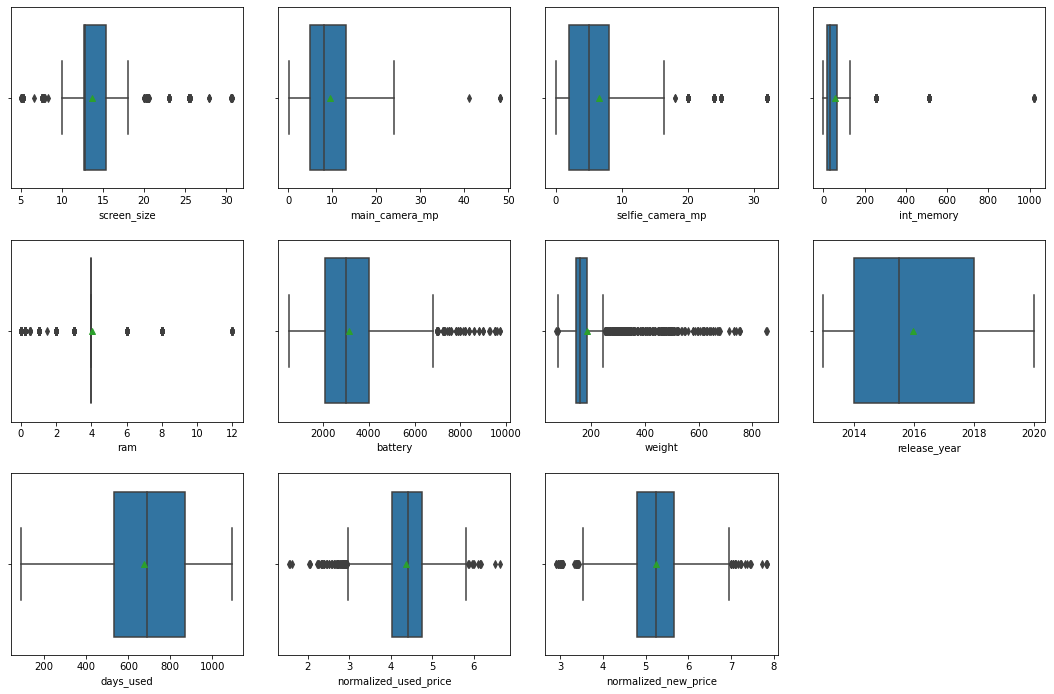

In [13]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df, x=variable, showmeans=True)
    plt.tight_layout(pad=2)

plt.show()

#### Observations
- All the numerical columns for the exception of days_used and release_year have outliers.
- In all cases for the exception of int_memory the outliers look reasonable and seem to not be erroneously entered. int_memory is in units of GB and has outliers of 500GB and 1000GB (1TB) which seem exceedingly high.
- Since we currently do not have any additional information on int_memory we will leave the outliers in the analysis.

#### Clear up the nulls with median values

In [14]:
# checking column medians
df.median(numeric_only=True)

screen_size                12.830000
main_camera_mp              8.000000
selfie_camera_mp            5.000000
int_memory                 32.000000
ram                         4.000000
battery                  3000.000000
weight                    160.000000
release_year             2015.500000
days_used                 690.500000
normalized_used_price       4.405133
normalized_new_price        5.245892
dtype: float64

In [15]:
# Let's replace the missing values with median values of the columns group by release_year and brand_name
# We will group by release_year then brand_name to impute the columns with nulls shown below
#main_camera_mp           179
#selfie_camera_mp           2
#int_memory                 4
#ram                        4
#battery                    6
#weight                     7
columns_to_impute = ['main_camera_mp','selfie_camera_mp','int_memory','ram','battery',\
                    'weight']

# Iterate over columns to group by
for group_column in ['release_year', 'brand_name']:
    # Iterate over columns to impute
    for column in columns_to_impute:
        # Compute the median for numerical columns grouped by group_column
        df[column] = df[column].fillna(
            value=df.groupby(group_column)[column].transform("median"))

In [16]:
# Check for missing values
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Feature Engineering

#### Remove release_year and replace with years since release

In [17]:
df['years_since_release'] = 2021 - df['release_year']

df.drop('release_year', inplace=True, axis=1)

df['years_since_release'].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

### Univariate Analysis

#### Let's investigate brand_name

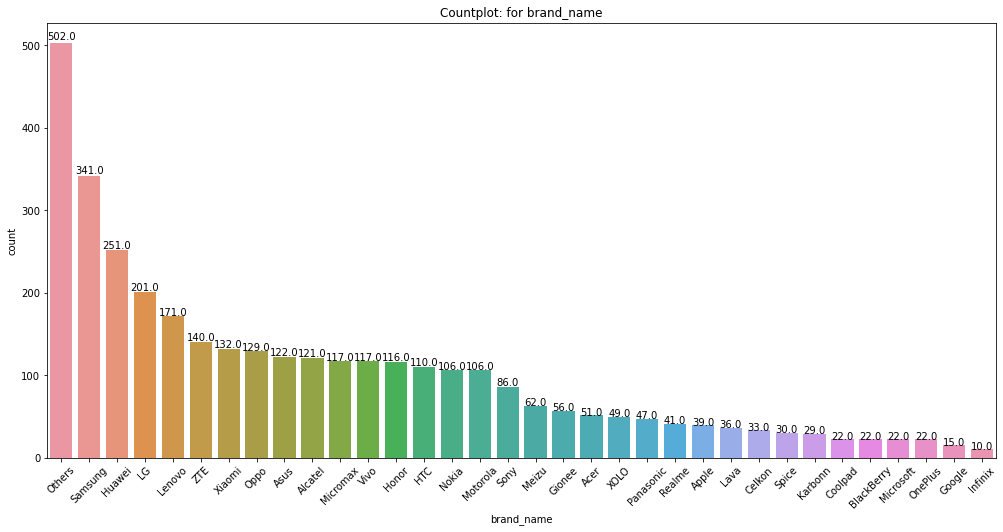

Others        0.145339
Samsung       0.098726
Huawei        0.072669
LG            0.058193
Lenovo        0.049508
ZTE           0.040533
Xiaomi        0.038217
Oppo          0.037348
Asus          0.035321
Alcatel       0.035032
Micromax      0.033874
Vivo          0.033874
Honor         0.033584
HTC           0.031847
Nokia         0.030689
Motorola      0.030689
Sony          0.024899
Meizu         0.017950
Gionee        0.016213
Acer          0.014765
XOLO          0.014186
Panasonic     0.013607
Realme        0.011870
Apple         0.011291
Lava          0.010423
Celkon        0.009554
Spice         0.008686
Karbonn       0.008396
Coolpad       0.006369
BlackBerry    0.006369
Microsoft     0.006369
OnePlus       0.006369
Google        0.004343
Infinix       0.002895
Name: brand_name, dtype: float64

In [18]:
# Countplot for brand_name
output_pretty_countplot(df, 'brand_name', \
                        order=df['brand_name'].value_counts().index,\
                        figsize=(17,8))
df['brand_name'].value_counts(normalize=True)

#### Observations
- The top five brand names are Others, Samsung, Huawei, LG and Lenovo.
- The top five brand names make up 42.44% of all the devices.

#### Let's investigate os

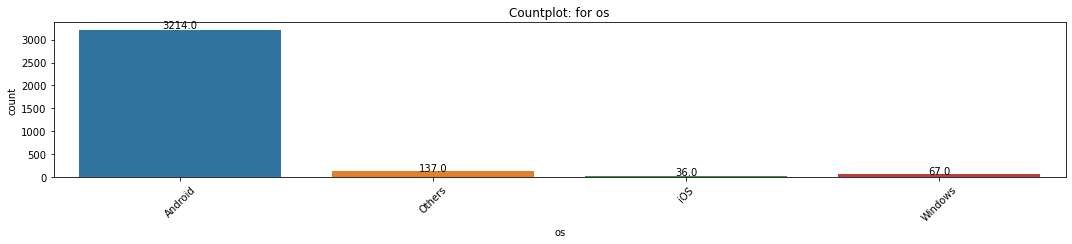

Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: os, dtype: float64

In [19]:
# Countplot for os
output_pretty_countplot(df, 'os')
df['os'].value_counts(normalize=True)

#### Observations
- Android is the top os and is employed on of the 93.05% (3214) of the devices.

#### Let's investigate 4g

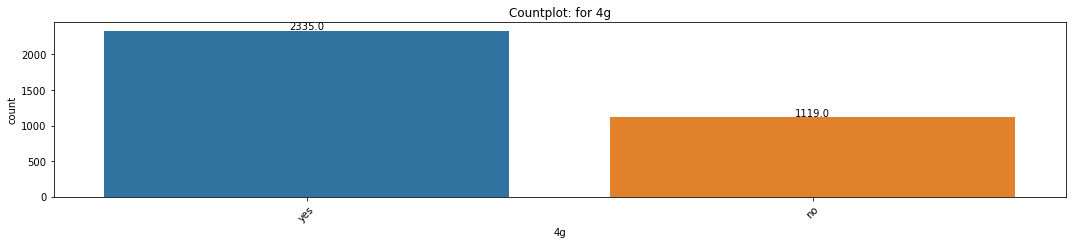

yes    0.676028
no     0.323972
Name: 4g, dtype: float64

In [20]:
# Countplot for 4g
output_pretty_countplot(df, '4g')
df['4g'].value_counts(normalize=True)

#### Observations
- 67.6% (2335) of the devices have 4g enabled.

#### Let's investigate 5g

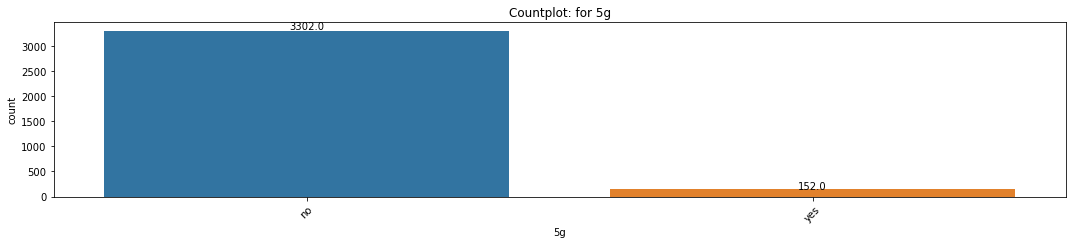

no     0.955993
yes    0.044007
Name: 5g, dtype: float64

In [21]:
# Countplot for 5g
output_pretty_countplot(df, '5g')
df['5g'].value_counts(normalize=True)

#### Observations
- 95.5% (3302) of the devices do not have 5g enabled.

#### Let's investigate screen_size

count    3454.000000
mean       13.713115
std         3.805280
min         5.080000
25%        12.700000
50%        12.830000
75%        15.340000
max        30.710000
Name: screen_size, dtype: float64


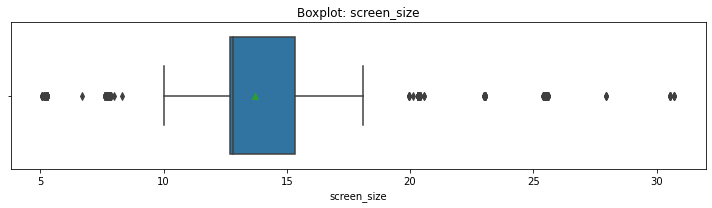

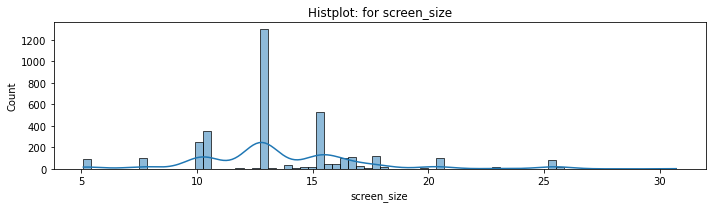

In [22]:
# Boxplot and Histplot for screen_size
output_pretty_numeric_plots(df, 'screen_size')

#### Observations
- Min for screen_size is 5.08 and the max is 30.71.
- The mean screen_size is 13.71 which is greater than the median indicating the data is right skewed.
- screen_size is modal and has one large peak.
- There are outliers in screen_size.

#### Let's investigate main_camera_mp

count    3454.000000
mean        9.456624
std         4.712036
min         0.080000
25%         5.000000
50%         8.000000
75%        13.000000
max        48.000000
Name: main_camera_mp, dtype: float64


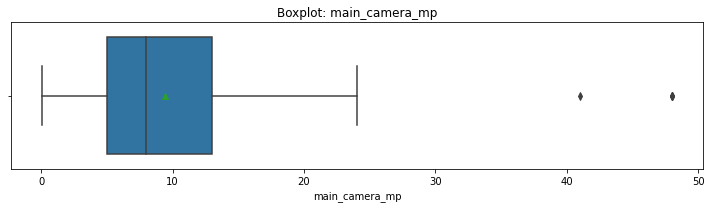

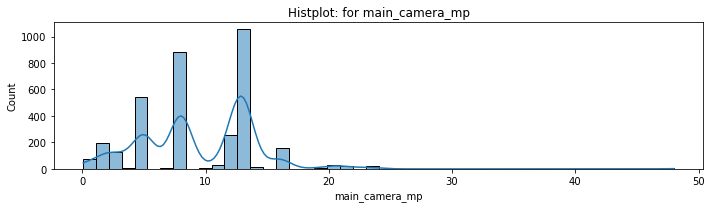

In [23]:
# Boxplot and Histplot for main_camera_mp
output_pretty_numeric_plots(df, 'main_camera_mp')

#### Observations
- Min main_camera_mp is 0.08 and the max is 48.
- The mean main_camera_mp is 9.45 which is greater than the median indicating the data is right skewed.
- The are outliers in main_camera_mp.

#### Let's investigate selfie_camera_mp

count    3454.000000
mean        6.555067
std         6.968440
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        32.000000
Name: selfie_camera_mp, dtype: float64


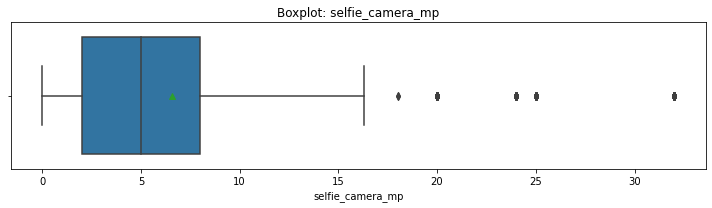

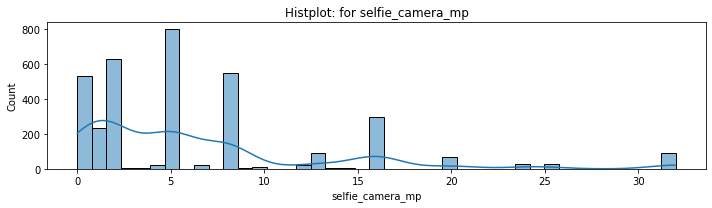

In [24]:
# Boxplot and Histplot for selfie_camera_mp
output_pretty_numeric_plots(df, 'selfie_camera_mp')

#### Observations
- Min selfie_camera_mp is 0.00 and the max is 32
- The mean selfie_camera_mp is 6.55 which is greater than the median indicating the data is right skewed.
- The min value of 0 likely indicates that some devices did not have selfie cameras.
- There are outliers in selfie_camera_mp

#### Let's investigate int_memory

count    3454.000000
mean       54.560854
std        84.926848
min         0.010000
25%        16.000000
50%        32.000000
75%        64.000000
max      1024.000000
Name: int_memory, dtype: float64


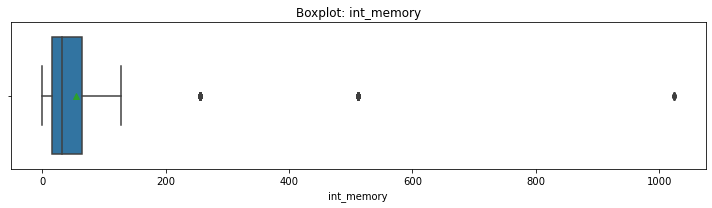

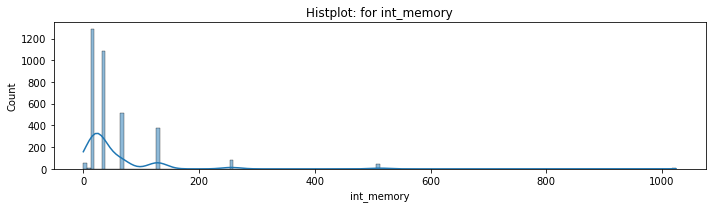

In [25]:
# Boxplot and Histplot for int_memory
output_pretty_numeric_plots(df, 'int_memory')

#### Observations
- Min int_memory is 0.01 and the max is 1024.
- The mean int_memory is 54.56 which is greater than the median indicating the data is right skewed.
- There are outliers in int_memory.

#### Let's investigate ram

count    3454.000000
mean        4.037238
std         1.365132
min         0.020000
25%         4.000000
50%         4.000000
75%         4.000000
max        12.000000
Name: ram, dtype: float64


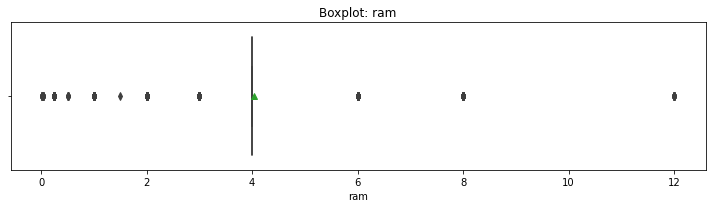

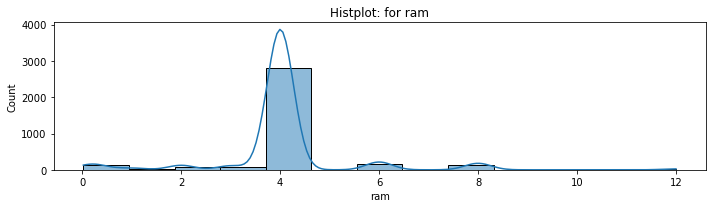

In [26]:
# Boxplot and Histplot for ram
output_pretty_numeric_plots(df, 'ram')

#### Observations
- Min ram is 0.02 and the max is 12.
- The mean ram is 4.037 which is greater than the median indicating the data is right skewed.
- ram is modal and has one large peak.
- There are outliers in ram.

#### Let's investigate battery

count    3454.000000
mean     3132.186595
std      1298.991203
min       500.000000
25%      2100.000000
50%      3000.000000
75%      4000.000000
max      9720.000000
Name: battery, dtype: float64


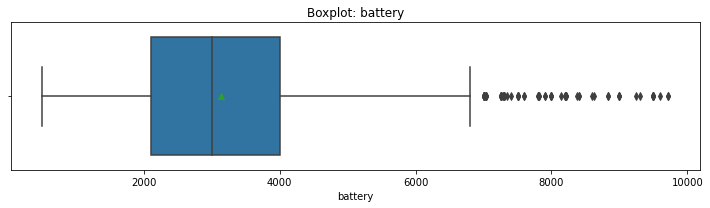

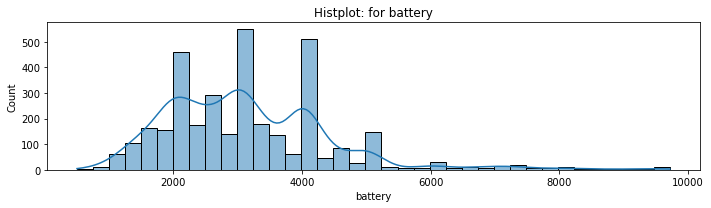

In [27]:
# Boxplot and Histplot for battery
output_pretty_numeric_plots(df, 'battery')

#### Observations
- Min battery is 500 and the max is 9720.
- The mean battery is 3132.18 which is greater than the median indicating the data is right skewed.
- There are outliers in battery.

#### Let's investigate weight

count    3454.000000
mean      182.691575
std        88.333703
min        69.000000
25%       142.000000
50%       160.000000
75%       185.000000
max       855.000000
Name: weight, dtype: float64


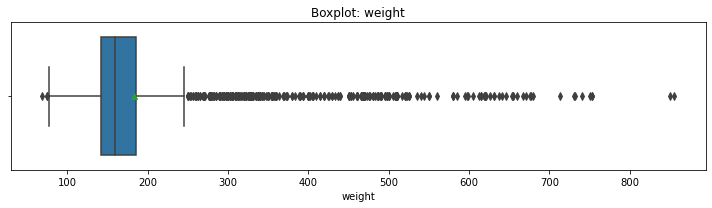

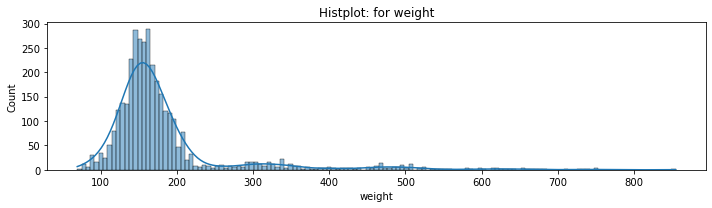

In [28]:
# Boxplot and Histplot for weight
output_pretty_numeric_plots(df, 'weight')

#### Observations
- Min weight is 69 and the max is 855.
- The mean weight is 182.69 which is greater than the median indicating the data is right skewed.
- weight is a bell shaped distribution with a right skew.
- There are outliers in weight.

#### Let's investigate years_since_release

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64


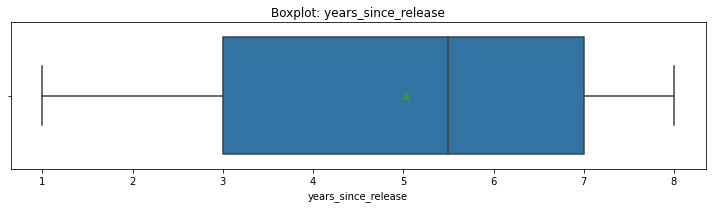

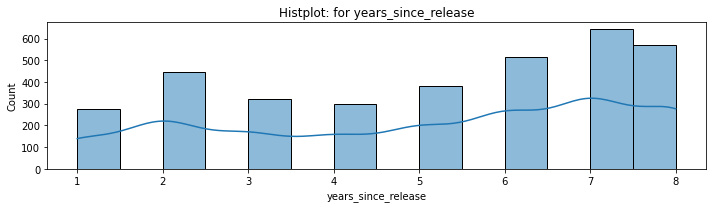

In [29]:
# Boxplot and Histplot for years_since_release
output_pretty_numeric_plots(df, 'years_since_release')

#### Observations
- Min years_since_release is 1.00 and the max is 8.
- The mean years_since_release is 5.034 which is less than the median indicating the data is left skewed.

#### Let's investigate days_used

count    3454.000000
mean      674.869716
std       248.580166
min        91.000000
25%       533.500000
50%       690.500000
75%       868.750000
max      1094.000000
Name: days_used, dtype: float64


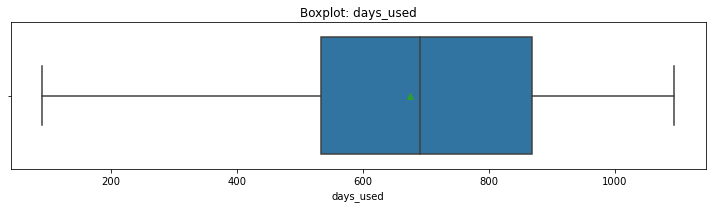

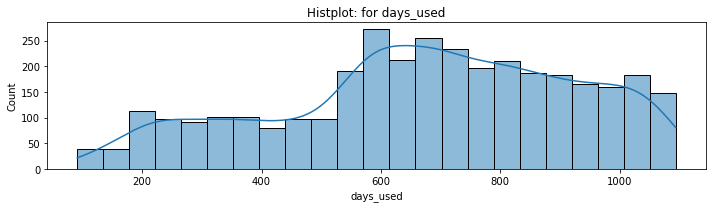

In [30]:
# Boxplot and Histplot for days_used
output_pretty_numeric_plots(df, 'days_used')

#### Observations
- Min days_used is 91.00 and the max is 1094.
- The mean days_used is 674.86 which is less than the median indicating the data is left skewed.

#### Let's investigate normalized_new_price

count    3454.000000
mean        5.233107
std         0.683637
min         2.901422
25%         4.790342
50%         5.245892
75%         5.673718
max         7.847841
Name: normalized_new_price, dtype: float64


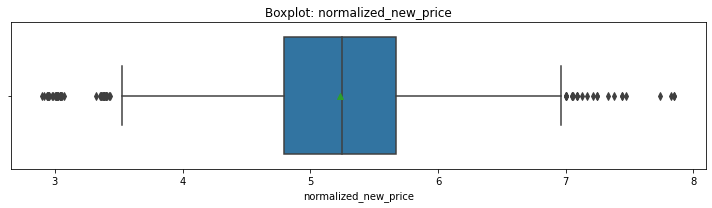

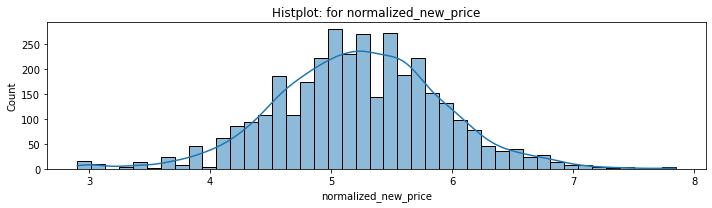

In [31]:
# Boxplot and Histplot for normalized_new_price
output_pretty_numeric_plots(df, 'normalized_new_price')

#### Observations
- Min normalized_new_price is 2.90 and the max is 7.84.
- The mean normalized_new_price is 5.23 which is less than the median indicating the data is left skewed.
- There are outliers in normalized_new_price.

## 1. What does the distribution of normalized used device prices look like?

count    3454.000000
mean        4.364712
std         0.588914
min         1.536867
25%         4.033931
50%         4.405133
75%         4.755700
max         6.619433
Name: normalized_used_price, dtype: float64


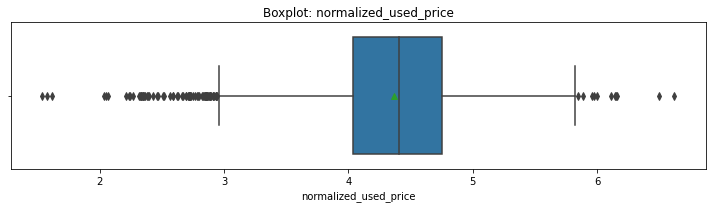

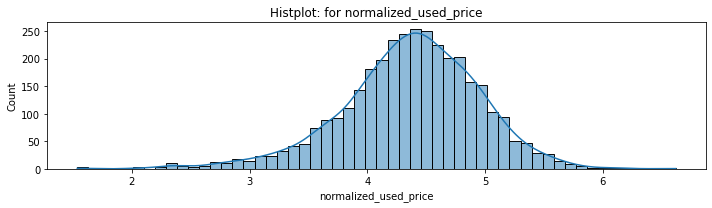

In [32]:
# Boxplot and Histplot for normalized_used_price
output_pretty_numeric_plots(df, 'normalized_used_price')

#### Observations
- Min normalized_used_price is 1.53 and the max is 6.61.
- The mean normalized_used_price is 4.36 which is less than the median indicating the data is left skewed.
- The distribution is similar to a normal distribution even though it is left skewed.
- There are outliers in normalized_used_price.

## 2. What percentage of the used device market is dominated by Android devices?

In [33]:
df['os'].value_counts(normalize=True)

Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: os, dtype: float64

#### Observations
- Android is employed on 93.05% of all devices.

### Bivariate Analysis

#### <a name='link1'>Let's investigate correlation</a>

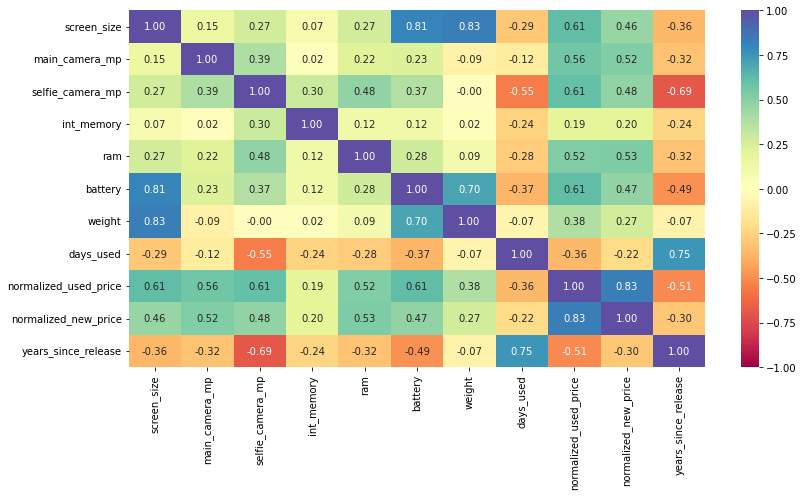

In [34]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations
- normalized_new_price and normalized_used_price have a high positive correlation of .83.
- screen_size and weight have a high positive correlation of .83.
- screen_size and battery have a high positive correlation of .81.
- days_used has a high positive correlation of .75 with years_since_release.
- weight and battery have a high positive correlation of .7
- battery, selfie_camera_mp, screen size have a positive correlation of .61 with normalized_used_price.
- years_since_release has a negative correlation of -.51 with normalized_used_price.

#### Let's investigate os vs 4g

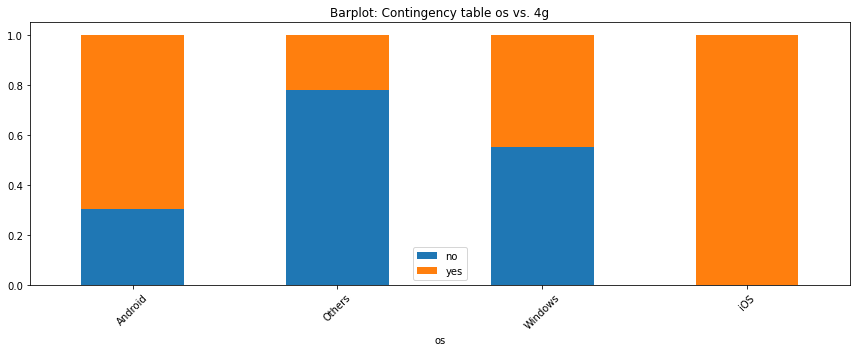

4g,no,yes
os,,
Android,0.303360,0.696640
Others,0.781022,0.218978
Windows,0.552239,0.447761
iOS,0.000000,1.000000


In [35]:
# crosstab plot of os vs 4g
output_pretty_crosstab_plot('Barplot: Contingency table os vs. 4g', \
                            df['os'], df['4g'])

#### Observations
- 69.6% of Android devices have 4g enabled.
- 21.89% of Others devices have 4g enabled.
- 44.7% of Windows devices have 4g enabled.
- 100% of iOS devices have 4g enabled.

#### Let's investigate os vs 5g

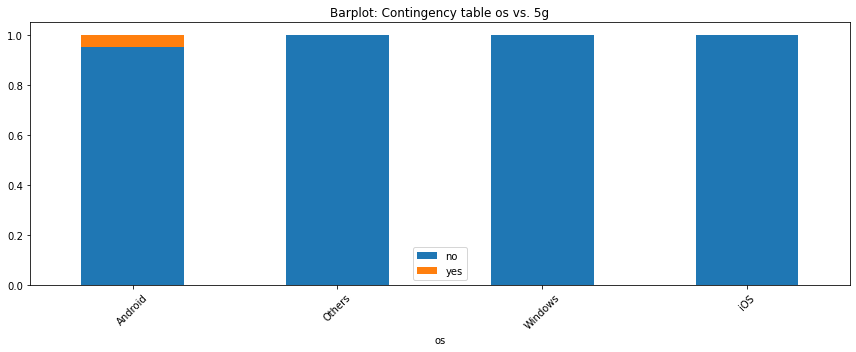

5g,no,yes
os,,
Android,0.952707,0.047293
Others,1.000000,0.000000
Windows,1.000000,0.000000
iOS,1.000000,0.000000


In [36]:
# crosstab plot of os vs 5g
output_pretty_crosstab_plot('Barplot: Contingency table os vs. 5g', \
                           df['os'], df['5g'])

#### Observations
- 95.2% of Android devices do not have 5g enabled.
- 100% of Others, Windows and iOS devices do not have 5g enabled.
- It is clear that for this dataset vintage the 5g protocol had just come out and had yet to surpass 4g and earlier protocols.

#### Let's investigate 4g, 5g and os

In [37]:
# Break down the 4g and 5g supported phones
pd.crosstab([df['4g'],df['5g']], df['os'], margins=True, margins_name='Total')

os         Android  Others  Windows  iOS  Total
4g    5g                                       
no    no       975     107       37    0   1119
yes   no      2087      30       30   36   2183
      yes      152       0        0    0    152
Total         3214     137       67   36   3454

In [38]:
fourg_only_mean_price = df[(df['4g'] == 'yes') & (df['5g'] == 'no')]['normalized_used_price'].mean()
pre4g_only_mean_price = df[(df['4g'] == 'no') & (df['5g'] == 'no')]['normalized_used_price'].mean()
fourg_and_5g_mean_price = df[(df['4g'] == 'yes') & (df['5g'] == 'yes')]['normalized_used_price'].mean()
print('Mean price for pre-4g phones is {}'.format(pre4g_only_mean_price))
print('Mean price for 4g only phones is {}'.format(fourg_only_mean_price))
print('Mean price for 4g/5g phones is {}'.format(fourg_and_5g_mean_price))

Mean price for pre-4g phones is 3.896332308293038
Mean price for 4g only phones is 4.544867815395594
Mean price for 4g/5g phones is 5.225481758800481


#### Observations
- It appears that 152 devices (4.4%) have both 4g and 5g support.
- There are no 5g only support, this is likely because carriers want to be backwards compatible to earlier protocols.
- There are 1119 devices (32.3% of all devices) that do not support 4g or 5g which indicates they support 3g or earlier protocols.
- On average 4g/5g devices have a normalized_used_price 34.11% greater than pre-4g devices.
- On average 4g/5g devices have a normalized_used_price 14.96% greater than 4g only devices.

#### Let's investigate os vs screen_size

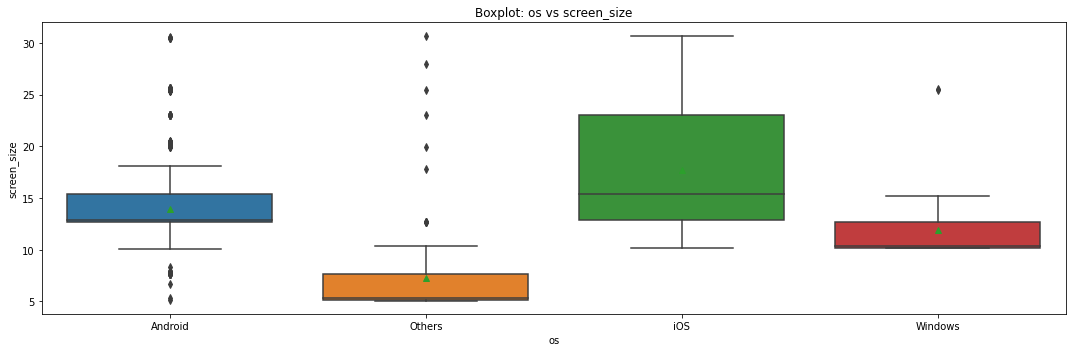

screen_size                                                        
              count       mean       std    min    25%    50%    75%    max
os                                                                         
Android      3214.0  13.982054  3.464719   5.18  12.70  12.83  15.37  30.56
Others        137.0   7.214453  4.285764   5.08   5.18   5.28   7.65  30.71
Windows        67.0  11.949254  2.799297  10.16  10.16  10.34  12.70  25.55
iOS            36.0  17.716667  6.784899  10.16  12.83  15.37  23.04  30.71

In [39]:
# Boxplot os vs screen_size
output_pretty_boxplot(df, x='os', y='screen_size',\
                     figsize=(15,5));
describe_df = df.groupby(['os'])[['screen_size']].describe()
describe_df

#### Observations
- iOS has the highest mean screen_size of 17.71 as compared to other os's.
- Others has the lowest mean screen_size of 7.21 as compared to other os's.


- Min screen_size value for Android os is 5.18 and max is 30.56
- Mean screen_size for Android os is 13.98 which is greater than the median indicating the data is right skewed.
- screen_size for Android has outliers.


- Min screen_size value for Others os is 5.08 and max is 30.71
- Mean screen_size for Others os is 7.21 which is greater than the median indicating the data is right skewed.
- screen_size for Others has outliers.


- Min screen_size value for Windows os is 10.16 and max is 25.55
- Mean screen_size for Windows os is 11.94 which is greater than the median indicating the data is right skewed.
- screen_size for Windows has outliers.


- Min screen_size value for iOS os is 10.16 and max is 30.71
- Mean screen_size for iOS os is 17.71 which is greater than the median indicating the data is right skewed.

#### Let's investigate os vs main_camera_mp

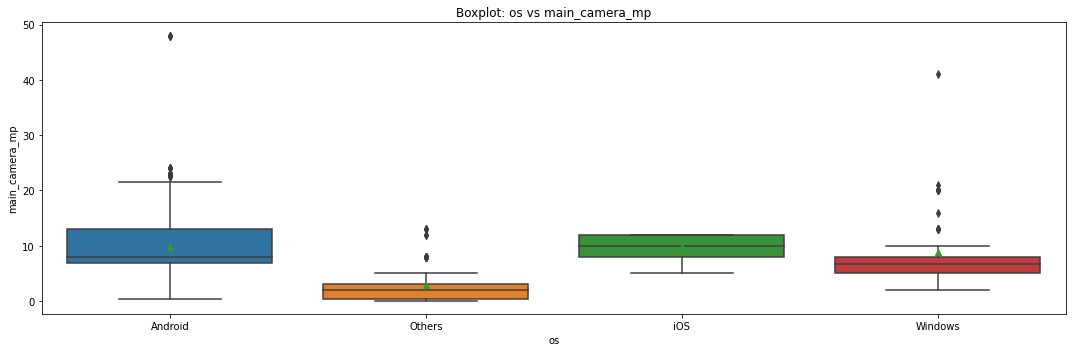

,count,mean,std,min,25%,50%,75%,max
os,,,,,,,,
Android,3214.0,9.746562,4.540112,0.30,6.875,8.0,13.00,48.0
Others,137.0,2.860803,2.970170,0.08,0.300,2.0,3.15,13.0
Windows,67.0,8.877612,6.489101,2.00,5.000,6.7,8.00,41.0
iOS,36.0,9.750000,2.418677,5.00,8.000,10.0,12.00,12.0


In [40]:
# Boxplot os vs main_camera_mp
output_pretty_boxplot(df, x='os', y='main_camera_mp',\
                     figsize=(15,5));
describe_df = df.groupby(['os'])['main_camera_mp'].describe();
describe_df

#### Observations
- iOS has the highest mean main_camera_mp of 9.75 as compared to other os's.
- Others has the lowest mean main_camera_mp of 2.86 as compared to other os's.


- Min main_camera_mp value for Android is 0.3 and max is 48.0
- Mean main_camera_mp for Android is 9.74 which is greater than the median indicating the data is right skewed.
- main_camera_mp for Android has outliers


- Min main_camera_mp value for Others is 0.08 and max is 13.0
- Mean main_camera_mp for Others is 2.86 which is greater than the median indicating the data is right skewed.
- main_camera_mp for Others has outliers


- Min main_camera_mp value for Windows is 2.0 and max is 41.0
- Mean main_camera_mp for Windows is 8.87 which is greater than the median indicating the data is right skewed.
- main_camera_mp for Windows has outliers


- Min main_camera_mp value for iOS is 5.0 and max is 12.0
- Mean main_camera_mp for iOS is 9.75 which is less than the median indicating the data is left skewed.

#### Let's investigate os vs selfie_camera_mp

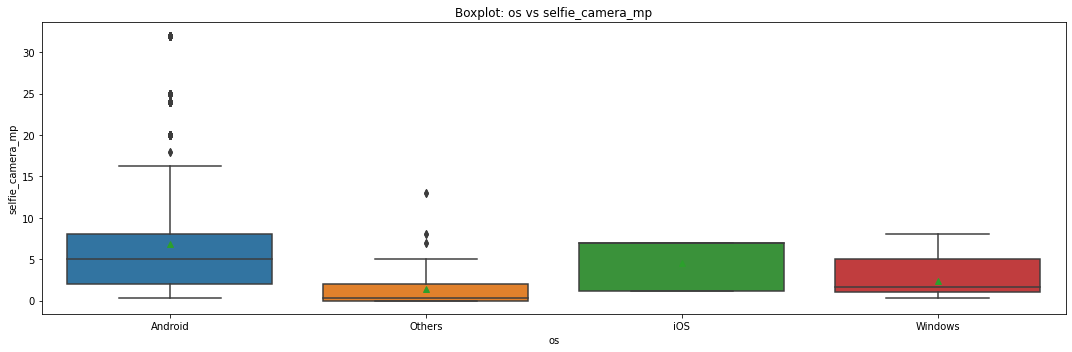

,count,mean,std,min,25%,50%,75%,max
os,,,,,,,,
Android,3214.0,6.886963,7.080292,0.3,2.0,5.0,8.0,32.0
Others,137.0,1.352555,2.226514,0.0,0.0,0.3,2.0,13.0
Windows,67.0,2.334328,1.996156,0.3,1.0,1.6,5.0,8.0
iOS,36.0,4.577778,2.786407,1.2,1.2,7.0,7.0,7.0


In [41]:
# Boxplot os vs selfie_camera_mp
output_pretty_boxplot(df, x='os', y='selfie_camera_mp',\
                     figsize=(15,5));
describe_df = df.groupby(['os'])['selfie_camera_mp'].describe();
describe_df

#### Observations
- Android has the highest mean selfie_camera_mp of 6.88 as compared to other os's.
- Others has the lowest mean selfie_camera_mp of 1.35 as compared to other os's.


- Min selfie_camera_mp value for Android is 0.30 and max is 32.00
- Mean selfie_camera_mp for Android is 6.88 which is greater than the median indicating the data is right skewed.
- selfie_camera_mp for Android has outliers.


- Min selfie_camera_mp value for Others is 0.00 and max is 13.00
- Mean selfie_camera_mp for Others is 1.35 which is greater than the median indicating the data is right skewed.
- selfie_camera_mp for Others has outliers.


- Min selfie_camera_mp value for Windows is 0.30 and max is 8.00
- Mean selfie_camera_mp for Windows is 2.33 which is greater than the median indicating the data is right skewed.


- Min selfie_camera_mp value for iOS is 1.20 and max is 7.00
- Mean selfie_camera_mp for iOS is 4.57 which is less than the median indicating the data is left skewed.

#### Let's investigate os vs ram

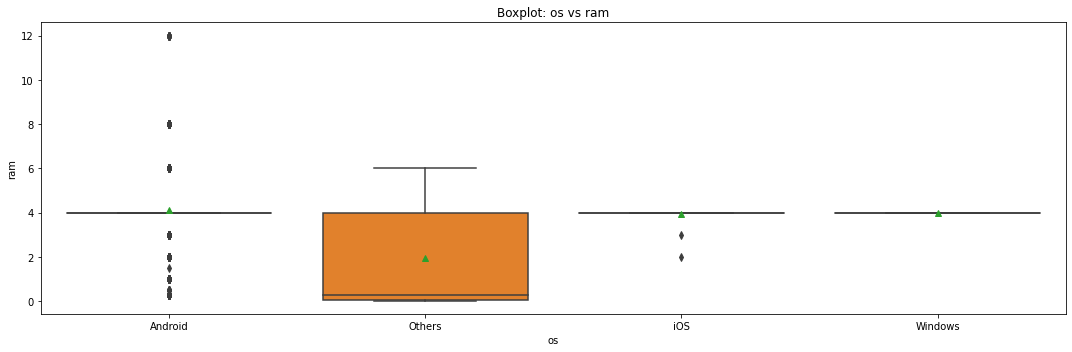

,count,mean,std,min,25%,50%,75%,max
os,,,,,,,,
Android,3214.0,4.128189,1.279651,0.25,4.00,4.00,4.0,12.0
Others,137.0,1.953431,2.005155,0.02,0.03,0.25,4.0,6.0
Windows,67.0,4.000000,0.000000,4.00,4.00,4.00,4.0,4.0
iOS,36.0,3.916667,0.368394,2.00,4.00,4.00,4.0,4.0


In [42]:
# Boxplot os vs ram
output_pretty_boxplot(df, x='os', y='ram',\
                     figsize=(15,5));
describe_df = df.groupby(['os'])['ram'].describe()
describe_df

#### Observations
- Android has the highest mean ram of 4.12 as compared to other os's.
- Others has the lowest mean ram of 1.95 as compared to other os's.


- Min ram value for Android is 0.25 and max is 12.00
- Mean ram for Android is 4.12 which is greater than the median indicating the data is right skewed.
- ram for Android has outliers.


- Min ram value for Others is 0.02 and max is 6.00
- Mean ram for Others is 1.95 which is greater than the median indicating the data is right skewed.


- Min ram value for Windows is 4.00 and max is 4.00
- Mean ram for Windows is 4.00 which is less than the median indicating the data has no skew.


- Min ram value for iOS is 2.00 and max is 4.00
- Mean ram for iOS is 3.91 which is less than the median indicating the data is left skewed.
- ram for iOS has outliers.

#### Let's investigate os vs battery

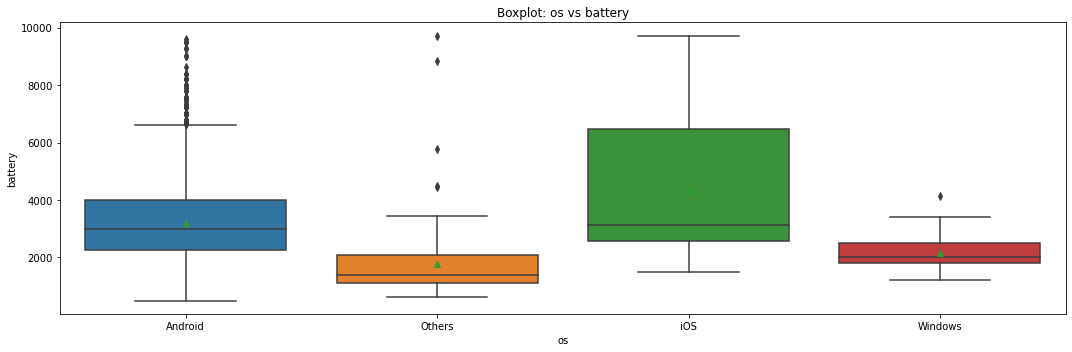

,count,mean,std,min,25%,50%,75%,max
os,,,,,,,,
Android,3214.0,3197.386434,1246.721851,500.0,2250.0,3000.0,4000.0,9600.0
Others,137.0,1757.390511,1225.384668,620.0,1100.0,1400.0,2100.0,9720.0
Windows,67.0,2167.164179,605.689079,1200.0,1800.0,2000.0,2500.0,4150.0
iOS,36.0,4339.166667,2487.880067,1510.0,2557.5,3142.0,6470.0,9720.0


In [43]:
# Boxplot os vs battery
output_pretty_boxplot(df, x='os', y='battery',\
                     figsize=(15,5));
describe_df = df.groupby(['os'])['battery'].describe()
describe_df

#### Observations
- iOS has the highest mean battery of 4339.16 as compared to other os's.
- Others has the lowest mean battery of 1757.39 as compared to other os's.


- Min battery value for Android is 500.00 and max is 9600.00
- Mean battery for Android is 3197.38 which is greater than the median indicating the data is right skewed.
- battery for Android has outliers.


- Min battery value for Others is 620.00 and max is 9720.00
- Mean battery for Others is 1757.39 which is greater than the median indicating the data is right skewed.
- battery for Others has outliers.


- Min battery value for Windows is 1200.00 and max is 4150.00
- Mean battery for Windows is 2167.16 which is greater than the median indicating the data is right skewed.
- battery for Windows has outliers.


- Min battery value for iOS is 1510.00 and max is 9720.00
- Mean battery for iOS is 4339.16 which is greater than the median indicating the data is right skewed.

#### Let's investigate os vs weight

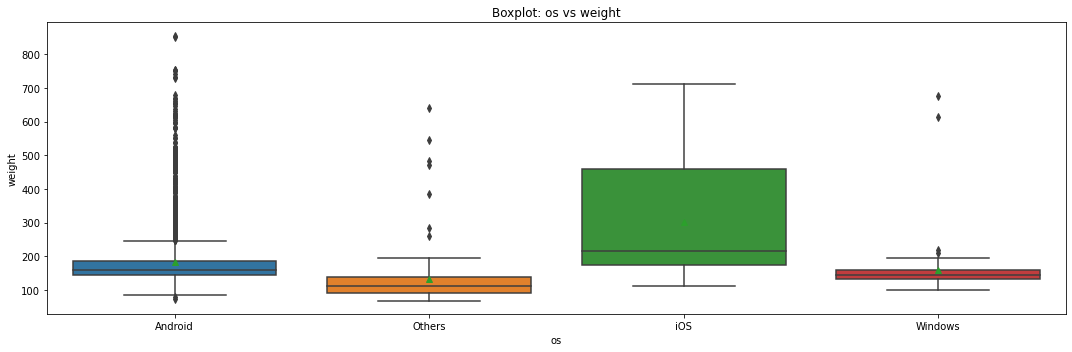

,count,mean,std,min,25%,50%,75%,max
os,,,,,,,,
Android,3214.0,183.982110,85.698600,75.0,143.5,161.0,185.0,855.0
Others,137.0,131.564234,81.515133,69.0,91.8,112.0,140.0,641.0
Windows,67.0,160.782090,88.405286,98.9,134.0,146.0,159.5,675.9
iOS,36.0,302.819444,169.999922,112.0,173.5,217.0,459.0,713.0


In [44]:
# Boxplot os vs weight
output_pretty_boxplot(df, x='os', y='weight',\
                     figsize=(15,5));
describe_df = df.groupby(['os'])['weight'].describe()
describe_df

#### Observations
- iOS has the highest mean weight of 302.8 as compared to other os's.
    - This is likely due to the finding that iOS devices have the largest mean battery and screen sizes.
- Others has the lowest mean weight of 131.56 as compared to other os's.


- Min weight value for Android is 75.00 and max is 855.00
- Mean weight for Android is 183.98 which is greater than the median indicating the data is right skewed.
- weight for Android has outliers.


- Min weight value for Others is 69.00 and max is 641.00
- Mean weight for Others is 131.56 which is greater than the median indicating the data is right skewed.
- weight for Others has outliers.


- Min weight value for Windows is 98.90 and max is 675.90
- Mean weight for Windows is 160.78 which is greater than the median indicating the data is right skewed.
- weight for Windows has outliers.


- Min weight value for iOS is 112.00 and max is 713.00
- Mean weight for iOS is 302.81 which is greater than the median indicating the data is right skewed.

#### Let's investigate os vs years_since_release

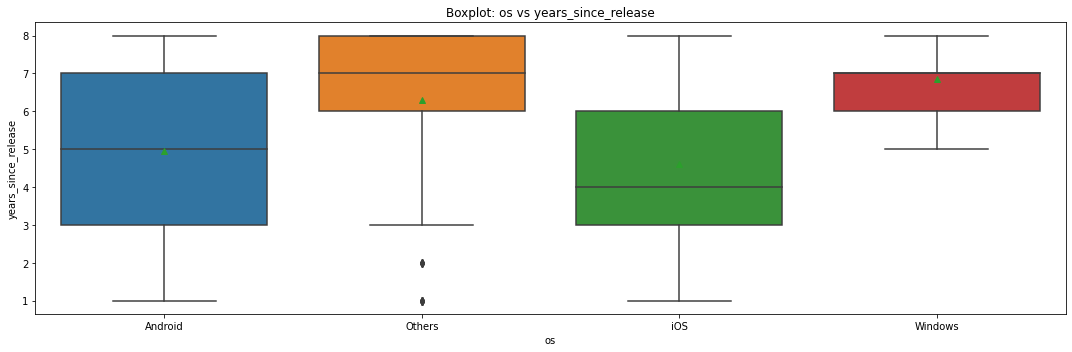

,count,mean,std,min,25%,50%,75%,max
os,,,,,,,,
Android,3214.0,4.947729,2.292847,1.0,3.0,5.0,7.0,8.0
Others,137.0,6.299270,2.250376,1.0,6.0,7.0,8.0,8.0
Windows,67.0,6.850746,0.821192,5.0,6.0,7.0,7.0,8.0
iOS,36.0,4.611111,2.046290,1.0,3.0,4.0,6.0,8.0


In [45]:
# Boxplot os vs years_since_release
output_pretty_boxplot(df, x='os', y='years_since_release',\
                     figsize=(15,5));
describe_df = df.groupby(['os'])['years_since_release'].describe()
describe_df

#### Observations
- Windows has the highest mean years_since_release of 6.85 as compared to other os's.
- iOS has the lowest mean years_since_release of 4.611 as compared to other os's.

- Min years_since_release value for Android os is 1.000 and max is 8.000
- Mean years_since_release for Android os is 4.948 which is less than the median indicating the data is left skewed.


- Min years_since_release value for Others os is 1.000 and max is 8.000
- Mean years_since_release for Others os is 6.299 which is less than the median indicating the data is left skewed.
- years_since_release for Others has outliers.

- Min years_since_release value for Windows os is 5.000 and max is 8.000
- Mean years_since_release for Windows os is 6.851 which is less than the median indicating the data is left skewed.


- Min years_since_release value for iOS os is 1.000 and max is 8.000
- Mean years_since_release for iOS os is 4.611 which is greater than the median indicating the data is right skewed.

#### Let's investigate os vs days_used

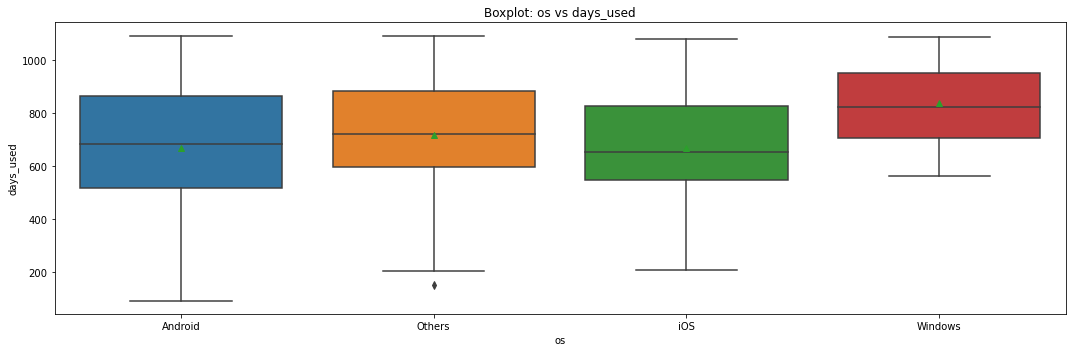

,count,mean,std,min,25%,50%,75%,max
os,,,,,,,,
Android,3214.0,669.704729,250.368281,91.0,516.0,684.0,866.0,1094.0
Others,137.0,718.401460,219.836552,148.0,596.0,720.0,883.0,1094.0
Windows,67.0,837.507463,147.439805,564.0,706.5,824.0,953.5,1089.0
iOS,36.0,667.638889,229.079918,208.0,546.0,654.0,828.5,1082.0


In [46]:
# Boxplot os vs days_used
output_pretty_boxplot(df, x='os', y='days_used',\
                     figsize=(15,5));
describe_df = df.groupby(['os'])['days_used'].describe()
describe_df

#### Observations
- Windows os has the highest mean days_used of 837.50 compared to all others.
- iOS os has the lowest mean days_used of 667.63 compared to all others.


- Min days_used value for Android os is 91.000 and max is 1094.000
- Mean days_used for Android os is 669.705 which is less than the median indicating the data is left skewed.


- Min days_used value for Others os is 148.000 and max is 1094.000
- Mean days_used for Others os is 718.401 which is less than the median indicating the data is left skewed.
- days_used for Others has outliers.


- Min days_used value for Windows os is 564.000 and max is 1089.000
- Mean days_used for Windows os is 837.507 which is greater than the median indicating the data is right skewed.


- Min days_used value for iOS os is 208.000 and max is 1082.000
- Mean days_used for iOS os is 667.639 which is greater than the median indicating the data is right skewed.

#### Let's investigate os vs normalized_used_price

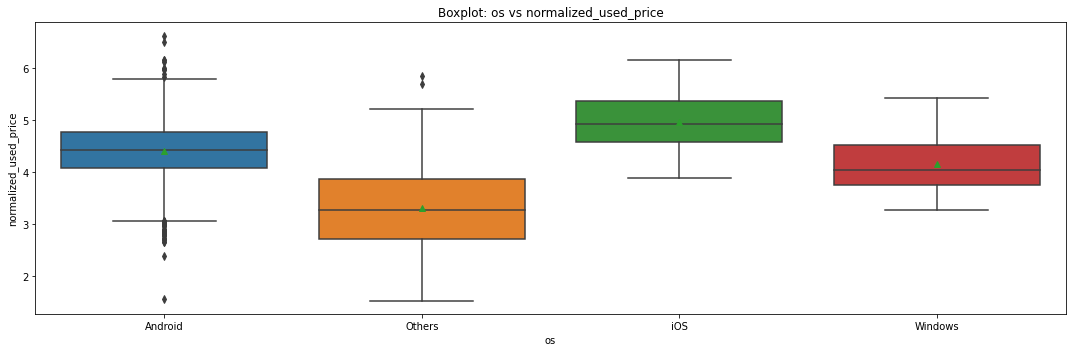

,count,mean,std,min,25%,50%,75%,max
os,,,,,,,,
Android,3214.0,4.407570,0.533616,1.572774,4.084042,4.424128,4.768224,6.619433
Others,137.0,3.306555,0.775769,1.536867,2.718660,3.283539,3.875566,5.847392
Windows,67.0,4.154517,0.490864,3.276390,3.759794,4.033532,4.516574,5.427853
iOS,36.0,4.956514,0.536092,3.879706,4.584658,4.930269,5.363245,6.158969


In [47]:
# Boxplot os vs normalized_used_price
output_pretty_boxplot(df, x='os', y='normalized_used_price',\
                     figsize=(15,5));
describe_df = df.groupby(['os'])['normalized_used_price'].describe()
describe_df

#### Observations
- iOS devices have the highest mean normalized_used_price of 4.95.
- Others devices have the lowest mean normalized_used_price of 3.30.


- Min normalized_used_price value for Android os is 1.573 and max is 6.619
- Mean normalized_used_price for Android os is 4.408 which is less than the median indicating the data is left skewed.
- normalized_used_price for Android has outliers.


- Min normalized_used_price value for Others os is 1.537 and max is 5.847
- Mean normalized_used_price for Others os is 3.307 which is greater than the median indicating the data is right skewed.
- normalized_used_price for Others has outliers.


- Min normalized_used_price value for Windows os is 3.276 and max is 5.428
- Mean normalized_used_price for Windows os is 4.155 which is greater than the median indicating the data is right skewed.


- Min normalized_used_price value for iOS os is 3.880 and max is 6.159
- Mean normalized_used_price for iOS os is 4.957 which is greater than the median indicating the data is right skewed.

#### Let's investigate ram vs normalized_used_price

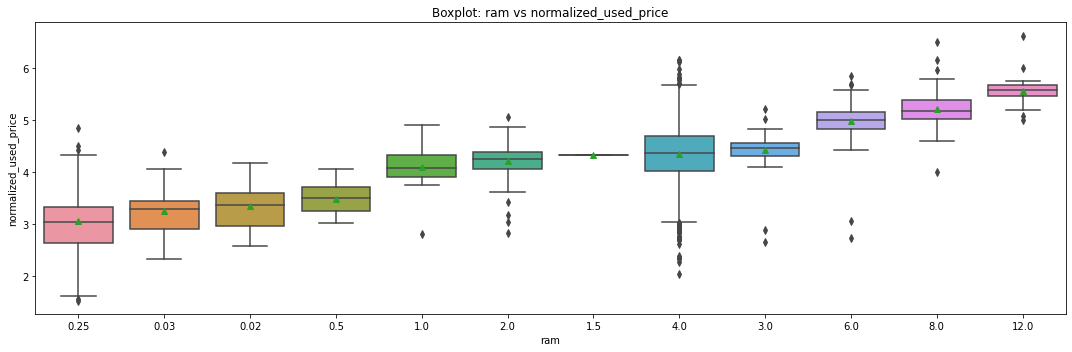

,count,mean,std,min,25%,50%,75%,max
ram,,,,,,,,
0.25,83.0,3.057891,0.676949,1.536867,2.640649,3.043570,3.324804,4.852265
0.03,17.0,3.263168,0.544460,2.343727,2.910174,3.292126,3.444576,4.391977
0.02,18.0,3.351395,0.462513,2.587012,2.969646,3.369017,3.591855,4.167595
0.50,9.0,3.489538,0.337328,3.027715,3.247269,3.495598,3.713572,4.053870
1.00,34.0,4.104062,0.364784,2.822569,3.904931,4.085380,4.328224,4.899853
2.00,90.0,4.209040,0.341299,2.834389,4.062906,4.246132,4.388313,5.056182
1.50,1.0,4.326117,NaN,4.326117,4.326117,4.326117,4.326117,4.326117
4.00,2817.0,4.344977,0.506239,2.052841,4.029095,4.373112,4.688960,6.158969
3.00,81.0,4.423601,0.327375,2.667228,4.319752,4.454580,4.560800,5.204446


In [48]:
# Boxplot ram vs normalized_old_price
sort_index = df.groupby('ram')[['normalized_used_price']].median().sort_values(by='normalized_used_price').index
output_pretty_boxplot(df, x='ram', y='normalized_used_price',\
                     figsize=(15,5), order=sort_index)
describe_df = df.groupby(['ram'])['normalized_used_price'].describe()
describe_df.sort_values(by='50%')

#### Observations
- The top three device ram values with the highest mean prices are 12, 8, and 6.
- The most expensive device ram is 12 with a mean normalized used_price of 5.56.
- The cheapest ram is .25 with a mean normalized used_price of 3.05.


- Min normalized_used_price value for 0.25 ram is 1.537 and max is 4.852
- Mean normalized_used_price for 0.25 ram is 3.058 which is greater than the median indicating the data is right skewed.
- normalized used price for .25 ram has outliers.


- Min normalized_used_price value for 0.03 ram is 2.344 and max is 4.392
- Mean normalized_used_price for 0.03 ram is 3.263 which is less than the median indicating the data is left skewed.
- normalized used price for .03 ram has outliers.


- Min normalized_used_price value for 0.02 ram is 2.587 and max is 4.168
- Mean normalized_used_price for 0.02 ram is 3.351 which is less than the median indicating the data is left skewed.


- Min normalized_used_price value for 0.5 ram is 3.028 and max is 4.054
- Mean normalized_used_price for 0.5 ram is 3.490 which is less than the median indicating the data is left skewed.


- Min normalized_used_price value for 1.0 ram is 2.823 and max is 4.900
- Mean normalized_used_price for 1.0 ram is 4.104 which is greater than the median indicating the data is right skewed.
- normalized used price for 1.0 ram has outliers.


- Min normalized_used_price value for 2.0 ram is 2.834 and max is 5.056
- Mean normalized_used_price for 2.0 ram is 4.209 which is less than the median indicating the data is left skewed.
- normalized used price for 2.0 ram has outliers.


- Min normalized_used_price value for 1.5 ram is 4.326 and max is 4.326
- Mean normalized_used_price for 1.5 ram is 4.326 which is the same as the median indicating the data is not skewed.


- Min normalized_used_price value for 4.0 ram is 2.053 and max is 6.159
- Mean normalized_used_price for 4.0 ram is 4.345 which is less than the median indicating the data is left skewed.
- normalized used price for 4.0 ram has outliers.


- Min normalized_used_price value for 3.0 ram is 2.667 and max is 5.204
- Mean normalized_used_price for 3.0 ram is 4.424 which is less than the median indicating the data is left skewed.
- normalized used price for 3.0 ram has outliers.


- Min normalized_used_price value for 6.0 ram is 2.729 and max is 5.847
- Mean normalized_used_price for 6.0 ram is 4.981 which is less than the median indicating the data is left skewed.
- normalized used price for 6.0 ram has outliers.


- Min normalized_used_price value for 8.0 ram is 4.002 and max is 6.500
- Mean normalized_used_price for 8.0 ram is 5.205 which is greater than the median indicating the data is right skewed.
- normalized used price for 8.0 ram has outliers.


- Min normalized_used_price value for 12.0 ram is 4.998 and max is 6.619
- Mean normalized_used_price for 12.0 ram is 5.566 which is less than the median indicating the data is left skew.
- normalized used price for 12.0 ram has outliers.

#### Let's investigate int_memory vs normalized_used_price

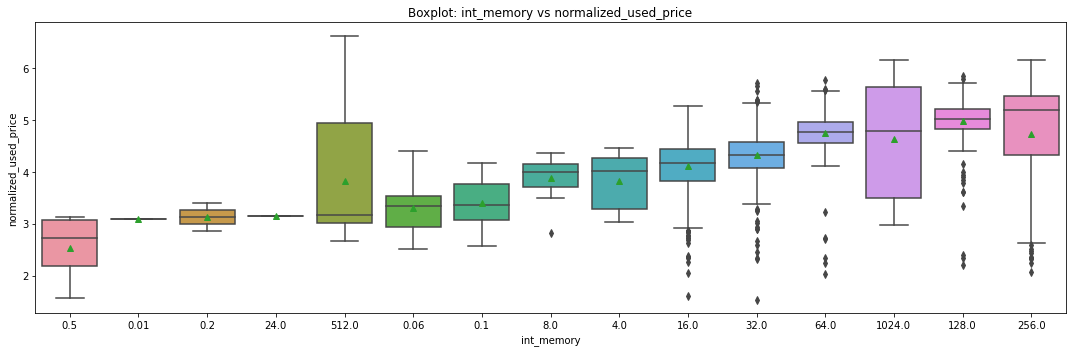

,count,mean,std,min,25%,50%,75%,max
int_memory,,,,,,,,
0.50,4.0,2.530526,0.718153,1.572774,2.183388,2.715248,3.062386,3.118834
0.01,1.0,3.097386,NaN,3.097386,3.097386,3.097386,3.097386,3.097386
0.20,2.0,3.130664,0.387768,2.856470,2.993567,3.130664,3.267761,3.404857
24.00,1.0,3.151453,NaN,3.151453,3.151453,3.151453,3.151453,3.151453
512.00,44.0,3.821371,1.290838,2.660260,3.008012,3.172831,4.932755,6.619433
0.06,18.0,3.294826,0.492439,2.519308,2.935053,3.331432,3.539501,4.391977
0.10,17.0,3.393485,0.454987,2.564949,3.072230,3.367296,3.772761,4.167595
8.00,12.0,3.880848,0.435473,2.822569,3.696093,4.003466,4.142714,4.357990
4.00,10.0,3.815567,0.560388,3.027715,3.280275,4.021612,4.261534,4.463261


In [49]:
# Boxplot int_memory vs normalized_old_price
sort_index = df.groupby('int_memory')[['normalized_used_price']].median().sort_values(by='normalized_used_price').index
output_pretty_boxplot(df, x='int_memory', y='normalized_used_price',\
                     figsize=(15,5), order=sort_index);
describe_df = df.groupby(['int_memory'])['normalized_used_price'].describe()
describe_df.sort_values(by='50%')

#### Observations
- The top three device int_memory values with the highest mean normalized_used_price are 128, 64 and 256.
- Note, that 1024GB of ram which is the most in the dataset is not in the top three most expensive on average.
- The most expensive device int_memory is 128 with a mean normalized_used_price of 4.98.
- The cheapest int_memory device is .5 with a mean normalized_used_price of 2.53.


- Min normalized_used_price value for 0.5 int_memory is 1.573 and max is 3.119
- Mean normalized_used_price for 0.5 int_memory is 2.531 which is less than the median indicating the data is left skewed.


- Min normalized_used_price value for 0.01 int_memory is 3.097 and max is 3.097
- Mean normalized_used_price for 0.01 int_memory is 3.097 which is the same as the median indicating the data is not skewed.


- Min normalized_used_price value for 0.2 int_memory is 2.856 and max is 3.405
- Mean normalized_used_price for 0.2 int_memory is 3.131 which is the same as the median indicating the data is not skewed.


- Min normalized_used_price value for 24.0 int_memory is 3.151 and max is 3.151
- Mean normalized_used_price for 24.0 int_memory is 3.151 which is the same as the median indicating the data is not skewed.


- Min normalized_used_price value for 512.0 int_memory is 2.660 and max is 6.619
- Mean normalized_used_price for 512.0 int_memory is 3.821 which is greater than the median indicating the data is right skewed.


- Min normalized_used_price value for 0.06 int_memory is 2.519 and max is 4.392
- Mean normalized_used_price for 0.06 int_memory is 3.295 which is less than the median indicating the data is left skewed.


- Min normalized_used_price value for 0.1 int_memory is 2.565 and max is 4.168
- Mean normalized_used_price for 0.1 int_memory is 3.393 which is greater than the median indicating the data is right skewed.


- Min normalized_used_price value for 8.0 int_memory is 2.823 and max is 4.358
- Mean normalized_used_price for 8.0 int_memory is 3.881 which is less than the median indicating the data is left skewed.
- 8.0 int_memory for normalized_used_price has outliers.


- Min normalized_used_price value for 4.0 int_memory is 3.028 and max is 4.463
- Mean normalized_used_price for 4.0 int_memory is 3.816 which is less than the median indicating the data is left skewed.


- Min normalized_used_price value for 16.0 int_memory is 1.617 and max is 5.263
- Mean normalized_used_price for 16.0 int_memory is 4.115 which is less than the median indicating the data is left skewed.
- 16.0 int_memory for normalized_used_price has outliers.


- Min normalized_used_price value for 32.0 int_memory is 1.537 and max is 5.699
- Mean normalized_used_price for 32.0 int_memory is 4.316 which is less than the median indicating the data is left skewed.
- 32.0 int_memory for normalized_used_price has outliers.


- Min normalized_used_price value for 64.0 int_memory is 2.033 and max is 5.759
- Mean normalized_used_price for 64.0 int_memory is 4.743 which is less than the median indicating the data is left skewed.
- 64.0 int_memory for normalized_used_price has outliers.


- Min normalized_used_price value for 1024.0 int_memory is 2.978 and max is 6.159
- Mean normalized_used_price for 1024.0 int_memory is 4.630 which is less than the median indicating the data is left skewed.


- Min normalized_used_price value for 128.0 int_memory is 2.213 and max is 5.847
- Mean normalized_used_price for 128.0 int_memory is 4.986 which is less than the median indicating the data is left skewed.
- 128.0 int_memory for normalized_used_price has outliers.


- Min normalized_used_price value for 256.0 int_memory is 2.063 and max is 6.153
- Mean normalized_used_price for 256.0 int_memory is 4.726 which is less than the median indicating the data is left skewed.
- 256.0 int_memory for normalized_used_price has outliers.

#### Let's investigate brand_name vs normalized_used_price

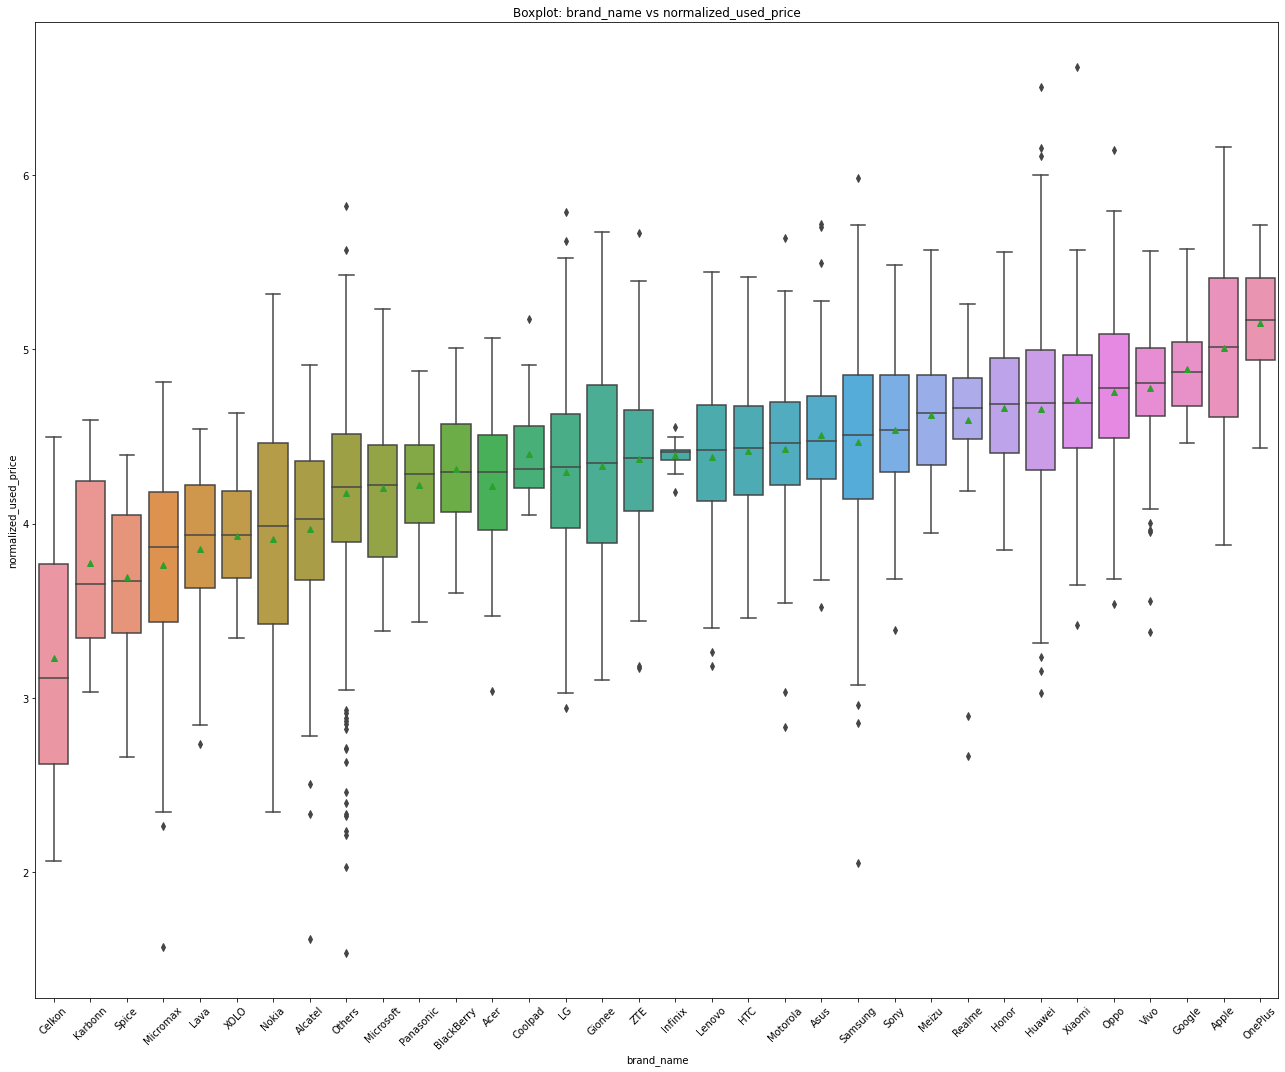

,count,mean,std,min,25%,50%,75%,max
brand_name,,,,,,,,
Celkon,33.0,3.230888,0.714299,2.063058,2.621039,3.116622,3.765609,4.493792
Karbonn,29.0,3.774956,0.501973,3.032546,3.345332,3.654547,4.246636,4.595019
Spice,30.0,3.694512,0.443307,2.660260,3.371251,3.670456,4.051780,4.391729
Micromax,117.0,3.761856,0.613527,1.572774,3.437208,3.867444,4.182661,4.812428
Lava,36.0,3.854529,0.473432,2.735665,3.629878,3.932396,4.220612,4.540205
XOLO,49.0,3.931499,0.313868,3.344627,3.690129,3.937106,4.184642,4.636281
Nokia,106.0,3.911802,0.676786,2.343727,3.424931,3.988336,4.460347,5.314043
Alcatel,121.0,3.970264,0.554915,1.617406,3.674527,4.026423,4.357990,4.911404
Others,502.0,4.173466,0.575550,1.536867,3.892330,4.210719,4.512452,5.820706


In [50]:
# Boxplot brand_name vs normalized_used_price
sort_index = df.groupby('brand_name')[['normalized_used_price']].median().sort_values(by='normalized_used_price').index
output_pretty_boxplot(df, x='brand_name', y='normalized_used_price',\
                     figsize=(18,15), order=sort_index, rotate_x=True)
describe_df = df.groupby(['brand_name'])['normalized_used_price'].describe()
describe_df.sort_values(by='50%')

#### Observations
- The top three brands with the highest mean normalized_used_price are: OnePlus, Apple and Google.
- The highest mean normalized_used_price is 5.152 for OnePlus devices.
- The lowest mean normalized_used_price is 3.23 for Celkon devices.


- Min normalized_used_price value for Celkon brand_name is 2.063 and max is 4.494
- Mean normalized_used_price for Celkon brand_name is 3.231 which is greater than the median indicating the data is right skewed.


- Min normalized_used_price value for Karbonn brand_name is 3.033 and max is 4.595
- Mean normalized_used_price for Karbonn brand_name is 3.775 which is greater than the median indicating the data is right skewed.


- Min normalized_used_price value for Spice brand_name is 2.660 and max is 4.392
- Mean normalized_used_price for Spice brand_name is 3.695 which is greater than the median indicating the data is right skewed.


- Min normalized_used_price value for Micromax brand_name is 1.573 and max is 4.812
- Mean normalized_used_price for Micromax brand_name is 3.762 which is less than the median indicating the data is left skewed.
- Micromax brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for Lava brand_name is 2.736 and max is 4.540
- Mean normalized_used_price for Lava brand_name is 3.855 which is less than the median indicating the data is left skewed.
- Lava brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for XOLO brand_name is 3.345 and max is 4.636
- Mean normalized_used_price for XOLO brand_name is 3.931 which is less than the median indicating the data is left skewed.


- Min normalized_used_price value for Nokia brand_name is 2.344 and max is 5.314
- Mean normalized_used_price for Nokia brand_name is 3.912 which is less than the median indicating the data is left skewed.


- Min normalized_used_price value for Alcatel brand_name is 1.617 and max is 4.911
- Mean normalized_used_price for Alcatel brand_name is 3.970 which is less than the median indicating the data is left skewed.
- Alcatel brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for Others brand_name is 1.537 and max is 5.821
- Mean normalized_used_price for Others brand_name is 4.173 which is less than the median indicating the data is left skewed.
- Others brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for Microsoft brand_name is 3.386 and max is 5.231
- Mean normalized_used_price for Microsoft brand_name is 4.206 which is less than the median indicating the data is left skewed.


- Min normalized_used_price value for Panasonic brand_name is 3.437 and max is 4.873
- Mean normalized_used_price for Panasonic brand_name is 4.219 which is less than the median indicating the data is left skewed.


- Min normalized_used_price value for BlackBerry brand_name is 3.603 and max is 5.008
- Mean normalized_used_price for BlackBerry brand_name is 4.314 which is greater than the median indicating the data is right skewed.


- Min normalized_used_price value for Acer brand_name is 3.042 and max is 5.066
- Mean normalized_used_price for Acer brand_name is 4.217 which is less than the median indicating the data is left skewed.
- Acer brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for Coolpad brand_name is 4.047 and max is 5.174
- Mean normalized_used_price for Coolpad brand_name is 4.400 which is greater than the median indicating the data is right skewed.
- Coolpad brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for LG brand_name is 2.945 and max is 5.789
- Mean normalized_used_price for LG brand_name is 4.297 which is less than the median indicating the data is left skewed.
- LG brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for Gionee brand_name is 3.105 and max is 5.675
- Mean normalized_used_price for Gionee brand_name is 4.330 which is less than the median indicating the data is left skewed.
- Gionee brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for ZTE brand_name is 3.174 and max is 5.668
- Mean normalized_used_price for ZTE brand_name is 4.368 which is less than the median indicating the data is left skewed.
- ZTE brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for Infinix brand_name is 4.181 and max is 4.555
- Mean normalized_used_price for Infinix brand_name is 4.391 which is less than the median indicating the data is left skewed.
- Infinix brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for Lenovo brand_name is 3.182 and max is 5.440
- Mean normalized_used_price for Lenovo brand_name is 4.380 which is less than the median indicating the data is left skewed.
- Lenovo brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for HTC brand_name is 3.456 and max is 5.415
- Mean normalized_used_price for HTC brand_name is 4.415 which is less than the median indicating the data is left skewed.


- Min normalized_used_price value for Motorola brand_name is 2.834 and max is 5.640
- Mean normalized_used_price for Motorola brand_name is 4.426 which is less than the median indicating the data is left skewed.
- Motorola brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for Asus brand_name is 3.523 and max is 5.715
- Mean normalized_used_price for Asus brand_name is 4.511 which is greater than the median indicating the data is right skewed.
- Asus brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for Samsung brand_name is 2.053 and max is 5.979
- Mean normalized_used_price for Samsung brand_name is 4.467 which is less than the median indicating the data is left skewed.
- Samsung brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for Sony brand_name is 3.390 and max is 5.483
- Mean normalized_used_price for Sony brand_name is 4.538 which is less than the median indicating the data is left skewed.
- Sony brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for Meizu brand_name is 3.948 and max is 5.569
- Mean normalized_used_price for Meizu brand_name is 4.622 which is less than the median indicating the data is left skewed.


- Min normalized_used_price value for Realme brand_name is 2.667 and max is 5.260
- Mean normalized_used_price for Realme brand_name is 4.594 which is less than the median indicating the data is left skewed.
- Realme brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for Honor brand_name is 3.848 and max is 5.557
- Mean normalized_used_price for Honor brand_name is 4.665 which is less than the median indicating the data is left skewed.


- Min normalized_used_price value for Huawei brand_name is 3.028 and max is 6.500
- Mean normalized_used_price for Huawei brand_name is 4.655 which is less than the median indicating the data is left skewed.
- Huawei brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for Xiaomi brand_name is 3.421 and max is 6.619
- Mean normalized_used_price for Xiaomi brand_name is 4.711 which is greater than the median indicating the data is right skewed.
- Xiaomi brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for Oppo brand_name is 3.537 and max is 6.143
- Mean normalized_used_price for Oppo brand_name is 4.755 which is less than the median indicating the data is left skewed.
- Oppo brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for Vivo brand_name is 3.379 and max is 5.560
- Mean normalized_used_price for Vivo brand_name is 4.778 which is less than the median indicating the data is left skewed.
- Vivo brand_name has outliers for normalized_used_price.


- Min normalized_used_price value for Google brand_name is 4.465 and max is 5.574
- Mean normalized_used_price for Google brand_name is 4.886 which is greater than the median indicating the data is right skewed.


- Min normalized_used_price value for Apple brand_name is 3.880 and max is 6.159
- Mean normalized_used_price for Apple brand_name is 5.005 which is less than the median indicating the data is left skewed.


- Min normalized_used_price value for OnePlus brand_name is 4.435 and max is 5.713
- Mean normalized_used_price for OnePlus brand_name is 5.152 which is less than the median indicating the data is left skewed.


#### Let's investigate brand_name vs normalized_new_price

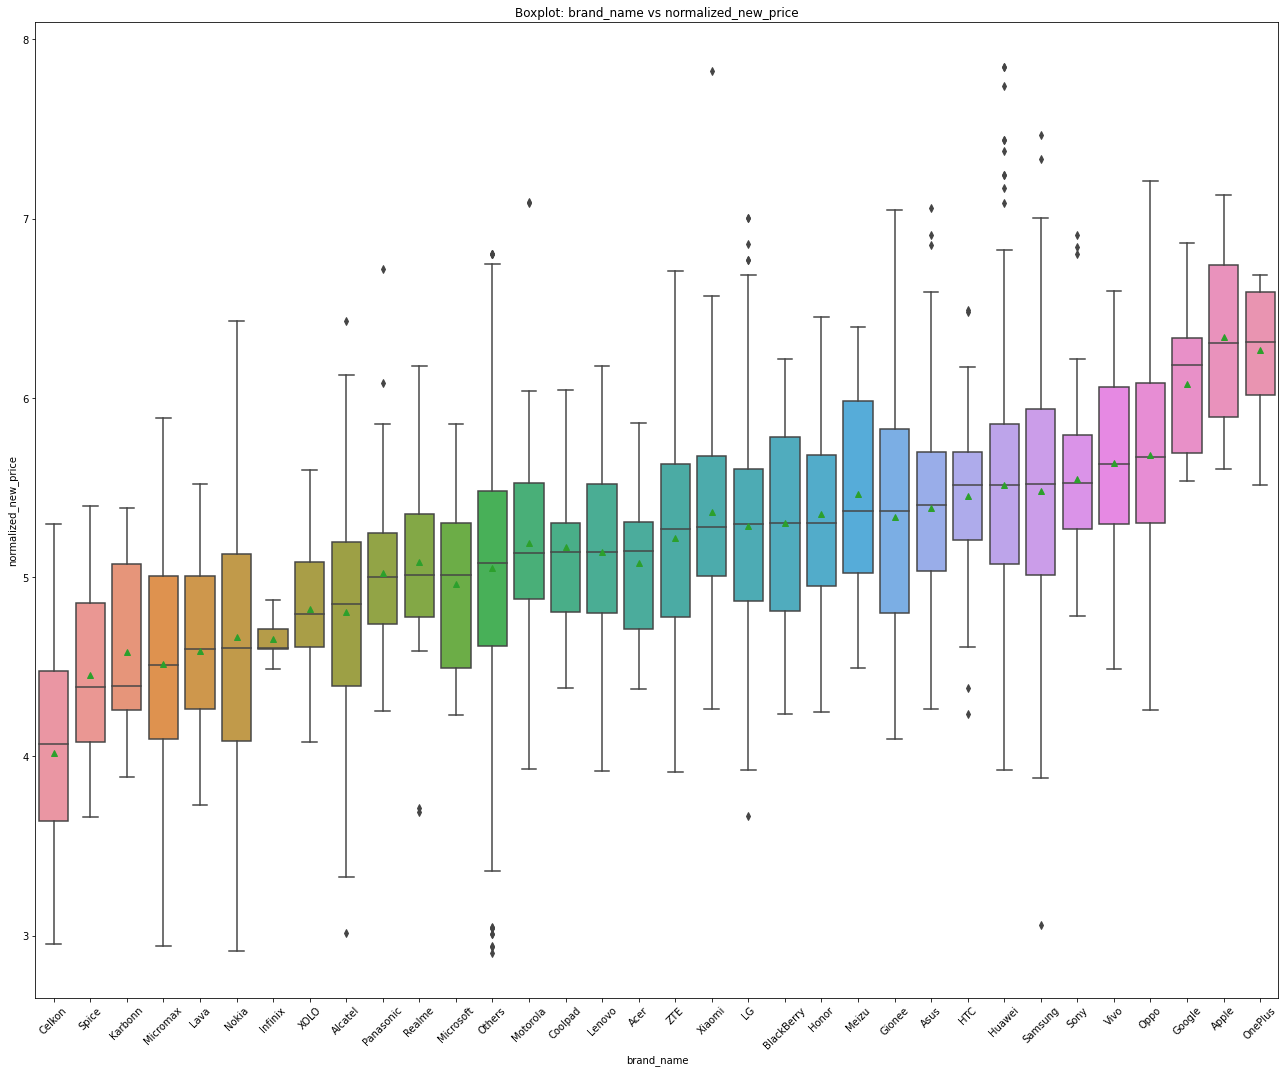

,count,mean,std,min,25%,50%,75%,max
brand_name,,,,,,,,
Celkon,33.0,4.018319,0.636865,2.951780,3.639164,4.070564,4.474150,5.297117
Spice,30.0,4.453086,0.519283,3.660737,4.081781,4.386755,4.853426,5.395898
Karbonn,29.0,4.582536,0.481347,3.884035,4.256322,4.394573,5.072921,5.386237
Micromax,117.0,4.513854,0.626023,2.940748,4.098337,4.510969,5.005690,5.885270
Lava,36.0,4.586627,0.437584,3.726657,4.261583,4.597490,5.006874,5.519659
Nokia,106.0,4.668024,0.796993,2.911263,4.085808,4.604369,5.127292,6.429235
Infinix,10.0,4.655516,0.132587,4.487287,4.598773,4.605670,4.709364,4.871297
XOLO,49.0,4.822616,0.326167,4.081090,4.608465,4.795212,5.083762,5.596457
Alcatel,121.0,4.804302,0.597944,3.014063,4.394573,4.850154,5.193457,6.430783


In [51]:
# Boxplot brand_name vs normalized_new_price
sort_index = df.groupby('brand_name')[['normalized_new_price']].median().sort_values(by='normalized_new_price').index
output_pretty_boxplot(df, x='brand_name', y='normalized_new_price',\
                     figsize=(18,15), order=sort_index, rotate_x=True);
describe_df = df.groupby(['brand_name'])['normalized_new_price'].describe()
describe_df.sort_values(by='50%')

#### Observations
- The top three brands with the highest mean normalized_new_price are: Apple, Oneplus and Google.
- The highest mean normalized_new_price is 6.33 for Apple devices.
- The lowest mean normalized_new_price is 4.01 for Celkon devices.


- Min normalized_new_price value for Celkon brand_name is 2.952 and max is 5.297
- Mean normalized_new_price for Celkon brand_name is 4.018 which is less than the median indicating the data is left skewed.


- Min normalized_new_price value for Spice brand_name is 3.661 and max is 5.396
- Mean normalized_new_price for Spice brand_name is 4.453 which is greater than the median indicating the data is right skewed.


- Min normalized_new_price value for Karbonn brand_name is 3.884 and max is 5.386
- Mean normalized_new_price for Karbonn brand_name is 4.583 which is greater than the median indicating the data is right skewed.


- Min normalized_new_price value for Micromax brand_name is 2.941 and max is 5.885
- Mean normalized_new_price for Micromax brand_name is 4.514 which is greater than the median indicating the data is right skewed.


- Min normalized_new_price value for Lava brand_name is 3.727 and max is 5.520
- Mean normalized_new_price for Lava brand_name is 4.587 which is less than the median indicating the data is left skewed.


- Min normalized_new_price value for Nokia brand_name is 2.911 and max is 6.429
- Mean normalized_new_price for Nokia brand_name is 4.668 which is greater than the median indicating the data is right skewed.


- Min normalized_new_price value for Infinix brand_name is 4.487 and max is 4.871
- Mean normalized_new_price for Infinix brand_name is 4.656 which is greater than the median indicating the data is right skewed.


- Min normalized_new_price value for XOLO brand_name is 4.081 and max is 5.596
- Mean normalized_new_price for XOLO brand_name is 4.823 which is greater than the median indicating the data is right skewed.


- Min normalized_new_price value for Alcatel brand_name is 3.014 and max is 6.431
- Mean normalized_new_price for Alcatel brand_name is 4.804 which is less than the median indicating the data is left skewed.
- Alcatel brand_name has outliers for normalized_new_price.


- Min normalized_new_price value for Panasonic brand_name is 4.256 and max is 6.720
- Mean normalized_new_price for Panasonic brand_name is 5.021 which is greater than the median indicating the data is right skewed.
- Panasonic brand_name has outliers for normalized_new_price.


- Min normalized_new_price value for Realme brand_name is 3.691 and max is 6.175
- Mean normalized_new_price for Realme brand_name is 5.083 which is greater than the median indicating the data is right skewed.
- Realme brand_name has outliers for normalized_new_price.


- Min normalized_new_price value for Microsoft brand_name is 4.228 and max is 5.856
- Mean normalized_new_price for Microsoft brand_name is 4.964 which is less than the median indicating the data is left skewed.


- Min normalized_new_price value for Others brand_name is 2.901 and max is 6.803
- Mean normalized_new_price for Others brand_name is 5.051 which is less than the median indicating the data is left skewed.
- Others brand_name has outliers for normalized_new_price.


- Min normalized_new_price value for Motorola brand_name is 3.932 and max is 7.091
- Mean normalized_new_price for Motorola brand_name is 5.192 which is greater than the median indicating the data is right skewed.
- Motorola brand_name has outliers for normalized_new_price.


- Min normalized_new_price value for Coolpad brand_name is 4.380 and max is 6.043
- Mean normalized_new_price for Coolpad brand_name is 5.170 which is greater than the median indicating the data is right skewed.


- Min normalized_new_price value for Lenovo brand_name is 3.921 and max is 6.177
- Mean normalized_new_price for Lenovo brand_name is 5.138 which is less than the median indicating the data is left skewed.


- Min normalized_new_price value for Acer brand_name is 4.378 and max is 5.862
- Mean normalized_new_price for Acer brand_name is 5.077 which is less than the median indicating the data is left skewed.


- Min normalized_new_price value for ZTE brand_name is 3.911 and max is 6.709
- Mean normalized_new_price for ZTE brand_name is 5.219 which is less than the median indicating the data is left skewed.


- Min normalized_new_price value for Xiaomi brand_name is 4.262 and max is 7.823
- Mean normalized_new_price for Xiaomi brand_name is 5.365 which is greater than the median indicating the data is right skewed.
- Xiaomi brand_name has outliers for normalized_new_price.


- Min normalized_new_price value for LG brand_name is 3.664 and max is 7.003
- Mean normalized_new_price for LG brand_name is 5.287 which is less than the median indicating the data is left skewed.
- LG brand_name has outliers for normalized_new_price.


- Min normalized_new_price value for BlackBerry brand_name is 4.234 and max is 6.217
- Mean normalized_new_price for BlackBerry brand_name is 5.304 which is greater than the median indicating the data is right skewed.


- Min normalized_new_price value for Honor brand_name is 4.248 and max is 6.452
- Mean normalized_new_price for Honor brand_name is 5.350 which is greater than the median indicating the data is right skewed.


- Min normalized_new_price value for Meizu brand_name is 4.491 and max is 6.397
- Mean normalized_new_price for Meizu brand_name is 5.463 which is greater than the median indicating the data is right skewed.


- Min normalized_new_price value for Gionee brand_name is 4.097 and max is 7.047
- Mean normalized_new_price for Gionee brand_name is 5.335 which is less than the median indicating the data is left skewed.


- Min normalized_new_price value for Asus brand_name is 4.264 and max is 7.059
- Mean normalized_new_price for Asus brand_name is 5.388 which is less than the median indicating the data is left skewed.
- Asus brand_name has outliers for normalized_new_price.


- Min normalized_new_price value for HTC brand_name is 4.238 and max is 6.493
- Mean normalized_new_price for HTC brand_name is 5.452 which is less than the median indicating the data is left skewed.
- HTC brand_name has outliers for normalized_new_price.


- Min normalized_new_price value for Huawei brand_name is 3.925 and max is 7.848
- Mean normalized_new_price for Huawei brand_name is 5.515 which is less than the median indicating the data is left skewed.
- Huawei brand_name has outliers for normalized_new_price.


- Min normalized_new_price value for Samsung brand_name is 3.057 and max is 7.468
- Mean normalized_new_price for Samsung brand_name is 5.483 which is less than the median indicating the data is left skewed.
- Samsung brand_name has outliers for normalized_new_price.


- Min normalized_new_price value for Sony brand_name is 4.783 and max is 6.907
- Mean normalized_new_price for Sony brand_name is 5.549 which is greater than the median indicating the data is right skewed.
- Sony brand_name has outliers for normalized_new_price.


- Min normalized_new_price value for Vivo brand_name is 4.486 and max is 6.595
- Mean normalized_new_price for Vivo brand_name is 5.638 which is greater than the median indicating the data is right skewed.


- Min normalized_new_price value for Oppo brand_name is 4.261 and max is 7.210
- Mean normalized_new_price for Oppo brand_name is 5.680 which is greater than the median indicating the data is right skewed.


- Min normalized_new_price value for Google brand_name is 5.538 and max is 6.866
- Mean normalized_new_price for Google brand_name is 6.078 which is less than the median indicating the data is left skewed.


- Min normalized_new_price value for Apple brand_name is 5.601 and max is 7.131
- Mean normalized_new_price for Apple brand_name is 6.340 which is greater than the median indicating the data is right skewed.


- Min normalized_new_price value for OnePlus brand_name is 5.514 and max is 6.687
- Mean normalized_new_price for OnePlus brand_name is 6.267 which is less than the median indicating the data is left skewed.



#### Let's investigate brand_name vs days_used

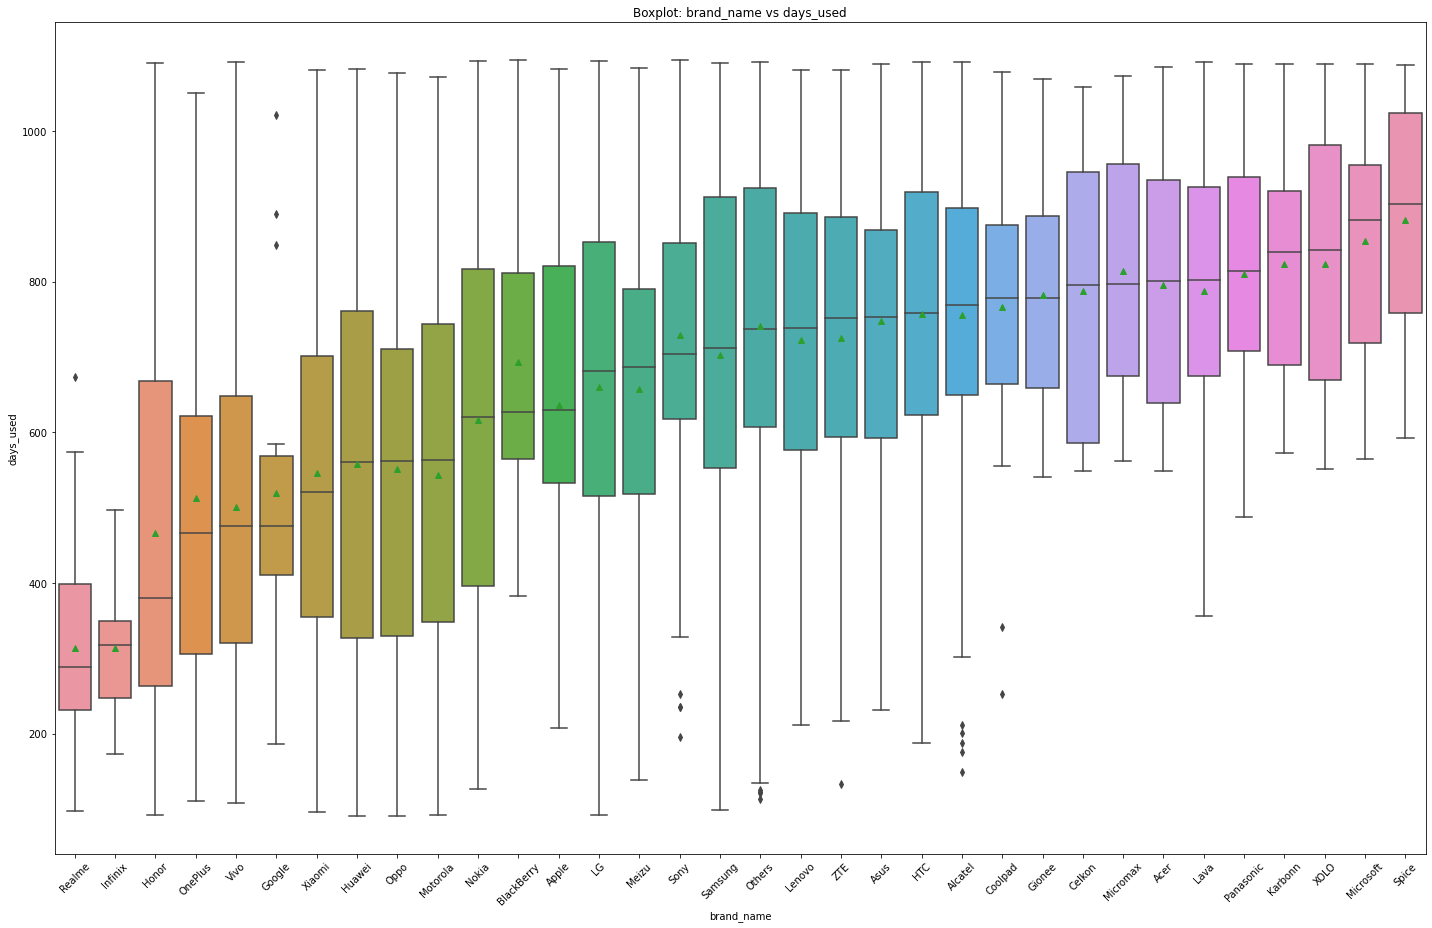

,count,mean,std,min,25%,50%,75%,max
brand_name,,,,,,,,
Realme,41.0,313.390244,135.200569,97.0,231.00,288.0,399.00,674.0
Infinix,10.0,313.300000,109.095320,173.0,247.75,318.0,349.25,497.0
Honor,116.0,466.025862,259.002953,92.0,262.75,380.0,668.50,1090.0
OnePlus,22.0,513.000000,283.895185,110.0,305.75,467.0,621.25,1050.0
Vivo,117.0,500.598291,222.643253,108.0,321.00,475.0,648.00,1092.0
Google,15.0,519.200000,237.937026,186.0,410.50,475.0,569.00,1021.0
Xiaomi,132.0,545.386364,246.448813,96.0,354.75,521.0,701.25,1081.0
Huawei,251.0,557.764940,264.812244,91.0,327.00,561.0,761.50,1082.0
Oppo,129.0,550.945736,256.179512,91.0,330.00,562.0,710.00,1077.0


In [52]:
# Boxplot brand_name vs days_used
sort_index = df.groupby('brand_name')[['days_used']].median().sort_values(by='days_used').index
output_pretty_boxplot(df, x='brand_name', y='days_used',\
                     figsize=(20,13), order=sort_index, rotate_x=True);
describe_df = df.groupby(['brand_name'])['days_used'].describe()
describe_df.sort_values(by='50%')

#### Observations
- The top three brand_name devices with the highest mean days_used are Spice, Microsoft and Karbonn.
- The top brand_name with the highest mean days_used is Spice with 881.23 days.
- The brand_name with the lowest mean days_used is Infinix with 313.3 days.


- Min days_used value for Realme brand_name is 97.000 and max is 674.000
- Mean days_used for Realme brand_name is 313.390 which is greater than the median indicating the data is right skewed.
- Realme brand_name has outliers for days_used.


- Min days_used value for Infinix brand_name is 173.000 and max is 497.000
- Mean days_used for Infinix brand_name is 313.300 which is less than the median indicating the data is left skewed.


- Min days_used value for Honor brand_name is 92.000 and max is 1090.000
- Mean days_used for Honor brand_name is 466.026 which is greater than the median indicating the data is right skewed.


- Min days_used value for OnePlus brand_name is 110.000 and max is 1050.000
- Mean days_used for OnePlus brand_name is 513.000 which is greater than the median indicating the data is right skewed.


- Min days_used value for Vivo brand_name is 108.000 and max is 1092.000
- Mean days_used for Vivo brand_name is 500.598 which is greater than the median indicating the data is right skewed.


- Min days_used value for Google brand_name is 186.000 and max is 1021.000
- Mean days_used for Google brand_name is 519.200 which is greater than the median indicating the data is right skewed.
- Google brand_name has outliers for days_used.


- Min days_used value for Xiaomi brand_name is 96.000 and max is 1081.000
- Mean days_used for Xiaomi brand_name is 545.386 which is greater than the median indicating the data is right skewed.


- Min days_used value for Huawei brand_name is 91.000 and max is 1082.000
- Mean days_used for Huawei brand_name is 557.765 which is less than the median indicating the data is left skewed.


- Min days_used value for Oppo brand_name is 91.000 and max is 1077.000
- Mean days_used for Oppo brand_name is 550.946 which is less than the median indicating the data is left skewed.


- Min days_used value for Motorola brand_name is 92.000 and max is 1072.000
- Mean days_used for Motorola brand_name is 543.189 which is less than the median indicating the data is left skewed.


- Min days_used value for Nokia brand_name is 127.000 and max is 1093.000
- Mean days_used for Nokia brand_name is 616.849 which is less than the median indicating the data is left skewed.


- Min days_used value for BlackBerry brand_name is 383.000 and max is 1094.000
- Mean days_used for BlackBerry brand_name is 692.909 which is greater than the median indicating the data is right skewed.


- Min days_used value for Apple brand_name is 208.000 and max is 1082.000
- Mean days_used for Apple brand_name is 636.308 which is greater than the median indicating the data is right skewed.


- Min days_used value for LG brand_name is 92.000 and max is 1093.000
- Mean days_used for LG brand_name is 660.279 which is less than the median indicating the data is left skewed.


- Min days_used value for Meizu brand_name is 139.000 and max is 1084.000
- Mean days_used for Meizu brand_name is 657.032 which is less than the median indicating the data is left skewed.


- Min days_used value for Sony brand_name is 195.000 and max is 1094.000
- Mean days_used for Sony brand_name is 728.977 which is greater than the median indicating the data is right skewed.
- Sony brand_name has outliers for days_used.


- Min days_used value for Samsung brand_name is 98.000 and max is 1090.000
- Mean days_used for Samsung brand_name is 702.167 which is less than the median indicating the data is left skewed.


- Min days_used value for Others brand_name is 113.000 and max is 1091.000
- Mean days_used for Others brand_name is 741.598 which is greater than the median indicating the data is right skewed.
- Others brand_name has outliers for days_used.


- Min days_used value for Lenovo brand_name is 212.000 and max is 1081.000
- Mean days_used for Lenovo brand_name is 722.661 which is less than the median indicating the data is left skewed.


- Min days_used value for ZTE brand_name is 133.000 and max is 1081.000
- Mean days_used for ZTE brand_name is 725.129 which is less than the median indicating the data is left skewed.
- ZTE brand_name has outliers for days_used.


- Min days_used value for Asus brand_name is 232.000 and max is 1089.000
- Mean days_used for Asus brand_name is 747.238 which is less than the median indicating the data is left skewed.


- Min days_used value for HTC brand_name is 187.000 and max is 1092.000
- Mean days_used for HTC brand_name is 756.818 which is less than the median indicating the data is left skewed.


- Min days_used value for Alcatel brand_name is 149.000 and max is 1092.000
- Mean days_used for Alcatel brand_name is 755.215 which is less than the median indicating the data is left skewed.
- Alcatel brand_name has outliers for days_used.


- Min days_used value for Coolpad brand_name is 252.000 and max is 1078.000
- Mean days_used for Coolpad brand_name is 766.227 which is less than the median indicating the data is left skewed.
- Coolpad brand_name has outliers for days_used.


- Min days_used value for Gionee brand_name is 541.000 and max is 1069.000
- Mean days_used for Gionee brand_name is 782.643 which is greater than the median indicating the data is right skewed.


- Min days_used value for Celkon brand_name is 549.000 and max is 1059.000
- Mean days_used for Celkon brand_name is 788.121 which is less than the median indicating the data is left skewed.


- Min days_used value for Micromax brand_name is 562.000 and max is 1073.000
- Mean days_used for Micromax brand_name is 814.744 which is greater than the median indicating the data is right skewed.


- Min days_used value for Acer brand_name is 549.000 and max is 1085.000
- Mean days_used for Acer brand_name is 795.922 which is less than the median indicating the data is left skewed.


- Min days_used value for Lava brand_name is 356.000 and max is 1091.000
- Mean days_used for Lava brand_name is 787.222 which is less than the median indicating the data is left skewed.


- Min days_used value for Panasonic brand_name is 487.000 and max is 1089.000
- Mean days_used for Panasonic brand_name is 810.468 which is less than the median indicating the data is left skewed.


- Min days_used value for Karbonn brand_name is 573.000 and max is 1089.000
- Mean days_used for Karbonn brand_name is 823.414 which is less than the median indicating the data is left skewed.


- Min days_used value for XOLO brand_name is 551.000 and max is 1089.000
- Mean days_used for XOLO brand_name is 823.245 which is less than the median indicating the data is left skewed.


- Min days_used value for Microsoft brand_name is 564.000 and max is 1089.000
- Mean days_used for Microsoft brand_name is 853.636 which is less than the median indicating the data is left skewed.


- Min days_used value for Spice brand_name is 592.000 and max is 1088.000
- Mean days_used for Spice brand_name is 881.233 which is less than the median indicating the data is left skewed.

#### Let's investigate brand_name vs years_since_release

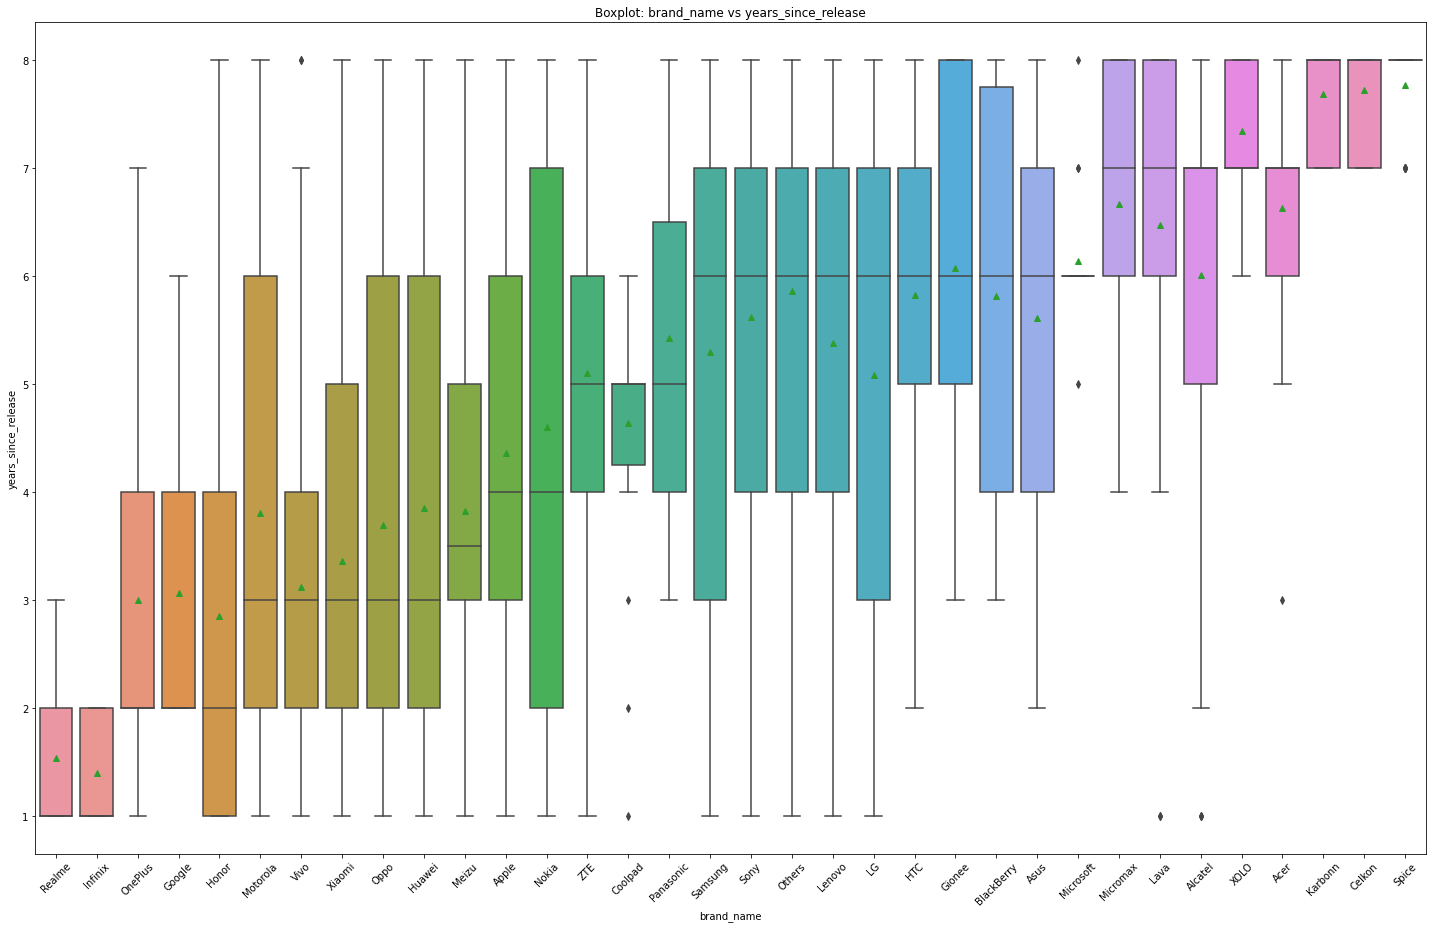

,count,mean,std,min,25%,50%,75%,max
brand_name,,,,,,,,
Realme,41.0,1.536585,0.710548,1.0,1.00,1.0,2.00,3.0
Infinix,10.0,1.400000,0.516398,1.0,1.00,1.0,2.00,2.0
OnePlus,22.0,3.000000,1.799471,1.0,2.00,2.0,4.00,7.0
Google,15.0,3.066667,1.387015,2.0,2.00,2.0,4.00,6.0
Honor,116.0,2.853448,2.022716,1.0,1.00,2.0,4.00,8.0
Motorola,106.0,3.801887,2.277926,1.0,2.00,3.0,6.00,8.0
Vivo,117.0,3.119658,1.630329,1.0,2.00,3.0,4.00,8.0
Xiaomi,132.0,3.356061,1.898704,1.0,2.00,3.0,5.00,8.0
Oppo,129.0,3.697674,2.149145,1.0,2.00,3.0,6.00,8.0


In [53]:
# Boxplot brand_name vs days_used
sort_index = df.groupby('brand_name')[['years_since_release']].median().sort_values(by='years_since_release').index
output_pretty_boxplot(df, x='brand_name', y='years_since_release',\
                     figsize=(20,13), order=sort_index, rotate_x=True);
describe_df = df.groupby(['brand_name'])['years_since_release'].describe()
describe_df.sort_values(by='50%')

#### Observations
- The top three brand_name devices with the highest mean years_since_release are Spice, Celkon and Karbonn.
- The top brand_name with the highest mean years_since_release is Spice with 7.76.
- The brand_name with the lowest mean years_since_release is Realeme with 1.53.


- Min years_since_release value for Realme brand_name is 1.000 and max is 3.000
- Mean years_since_release for Realme brand_name is 1.537 which is greater than the median indicating the data is right skewed.


- Min years_since_release value for Infinix brand_name is 1.000 and max is 2.000
- Mean years_since_release for Infinix brand_name is 1.400 which is greater than the median indicating the data is right skewed.


- Min years_since_release value for OnePlus brand_name is 1.000 and max is 7.000
- Mean years_since_release for OnePlus brand_name is 3.000 which is greater than the median indicating the data is right skewed.


- Min years_since_release value for Google brand_name is 2.000 and max is 6.000
- Mean years_since_release for Google brand_name is 3.067 which is greater than the median indicating the data is right skewed.


- Min years_since_release value for Honor brand_name is 1.000 and max is 8.000
- Mean years_since_release for Honor brand_name is 2.853 which is greater than the median indicating the data is right skewed.


- Min years_since_release value for Motorola brand_name is 1.000 and max is 8.000
- Mean years_since_release for Motorola brand_name is 3.802 which is greater than the median indicating the data is right skewed.


- Min years_since_release value for Vivo brand_name is 1.000 and max is 8.000
- Mean years_since_release for Vivo brand_name is 3.120 which is greater than the median indicating the data is right skewed.
- Vivo brand_name has outliers for years_since_release.


- Min years_since_release value for Xiaomi brand_name is 1.000 and max is 8.000
- Mean years_since_release for Xiaomi brand_name is 3.356 which is greater than the median indicating the data is right skewed.


- Min years_since_release value for Oppo brand_name is 1.000 and max is 8.000
- Mean years_since_release for Oppo brand_name is 3.698 which is greater than the median indicating the data is right skewed.


- Min years_since_release value for Huawei brand_name is 1.000 and max is 8.000
- Mean years_since_release for Huawei brand_name is 3.853 which is greater than the median indicating the data is right skewed.


- Min years_since_release value for Meizu brand_name is 1.000 and max is 8.000
- Mean years_since_release for Meizu brand_name is 3.823 which is greater than the median indicating the data is right skewed.


- Min years_since_release value for Apple brand_name is 1.000 and max is 8.000
- Mean years_since_release for Apple brand_name is 4.359 which is greater than the median indicating the data is right skewed.


- Min years_since_release value for Nokia brand_name is 1.000 and max is 8.000
- Mean years_since_release for Nokia brand_name is 4.604 which is greater than the median indicating the data is right skewed.


- Min years_since_release value for ZTE brand_name is 1.000 and max is 8.000
- Mean years_since_release for ZTE brand_name is 5.100 which is greater than the median indicating the data is right skewed.


- Min years_since_release value for Coolpad brand_name is 1.000 and max is 6.000
- Mean years_since_release for Coolpad brand_name is 4.636 which is less than the median indicating the data is left skewed.
- Coolpad brand_name has outliers for years_since_release.


- Min years_since_release value for Panasonic brand_name is 3.000 and max is 8.000
- Mean years_since_release for Panasonic brand_name is 5.426 which is greater than the median indicating the data is right skewed.


- Min years_since_release value for Samsung brand_name is 1.000 and max is 8.000
- Mean years_since_release for Samsung brand_name is 5.296 which is less than the median indicating the data is left skewed.


- Min years_since_release value for Sony brand_name is 1.000 and max is 8.000
- Mean years_since_release for Sony brand_name is 5.616 which is less than the median indicating the data is left skewed.


- Min years_since_release value for Others brand_name is 1.000 and max is 8.000
- Mean years_since_release for Others brand_name is 5.859 which is less than the median indicating the data is left skewed.


- Min years_since_release value for Lenovo brand_name is 1.000 and max is 8.000
- Mean years_since_release for Lenovo brand_name is 5.380 which is less than the median indicating the data is left skewed.


- Min years_since_release value for LG brand_name is 1.000 and max is 8.000
- Mean years_since_release for LG brand_name is 5.080 which is less than the median indicating the data is left skewed.


- Min years_since_release value for HTC brand_name is 2.000 and max is 8.000
- Mean years_since_release for HTC brand_name is 5.827 which is less than the median indicating the data is left skewed.


- Min years_since_release value for Gionee brand_name is 3.000 and max is 8.000
- Mean years_since_release for Gionee brand_name is 6.071 which is greater than the median indicating the data is right skewed.


- Min years_since_release value for BlackBerry brand_name is 3.000 and max is 8.000
- Mean years_since_release for BlackBerry brand_name is 5.818 which is less than the median indicating the data is left skewed.


- Min years_since_release value for Asus brand_name is 2.000 and max is 8.000
- Mean years_since_release for Asus brand_name is 5.615 which is less than the median indicating the data is left skewed.


- Min years_since_release value for Microsoft brand_name is 5.000 and max is 8.000
- Mean years_since_release for Microsoft brand_name is 6.136 which is greater than the median indicating the data is right skewed.
- Microsoft brand_name has outliers for years_since_release.


- Min years_since_release value for Micromax brand_name is 4.000 and max is 8.000
- Mean years_since_release for Micromax brand_name is 6.667 which is less than the median indicating the data is left skewed.


- Min years_since_release value for Lava brand_name is 1.000 and max is 8.000
- Mean years_since_release for Lava brand_name is 6.472 which is less than the median indicating the data is left skewed.
- Lava brand_name has outliers for years_since_release.


- Min years_since_release value for Alcatel brand_name is 1.000 and max is 8.000
- Mean years_since_release for Alcatel brand_name is 6.008 which is less than the median indicating the data is left skewed.
- Alcatel brand_name has outliers for years_since_release.


- Min years_since_release value for XOLO brand_name is 6.000 and max is 8.000
- Mean years_since_release for XOLO brand_name is 7.347 which is greater than the median indicating the data is right skewed.


- Min years_since_release value for Acer brand_name is 3.000 and max is 8.000
- Mean years_since_release for Acer brand_name is 6.627 which is less than the median indicating the data is left skewed.
- Acer brand_name has outliers for years_since_release.


- Min years_since_release value for Karbonn brand_name is 7.000 and max is 8.000
- Mean years_since_release for Karbonn brand_name is 7.690 which is less than the median indicating the data is left skewed.


- Min years_since_release value for Celkon brand_name is 7.000 and max is 8.000
- Mean years_since_release for Celkon brand_name is 7.727 which is less than the median indicating the data is left skewed.


- Min years_since_release value for Spice brand_name is 7.000 and max is 8.000
- Mean years_since_release for Spice brand_name is 7.767 which is less than the median indicating the data is left skewed.
- Spice brand_name has outliers for years_since_release.

#### Let's investigate 4g vs normalized_used_price

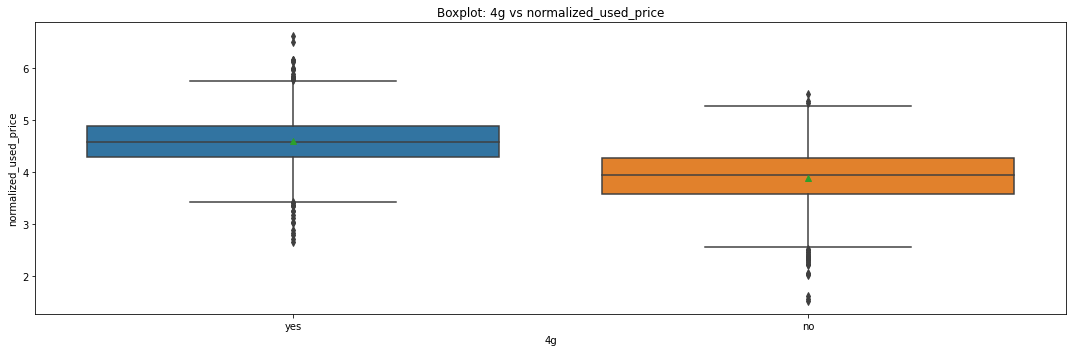

,count,mean,std,min,25%,50%,75%,max
4g,,,,,,,,
no,1119.0,3.896332,0.566646,1.536867,3.582268,3.949897,4.263876,5.494953
yes,2335.0,4.589173,0.451344,2.667228,4.297081,4.573267,4.881020,6.619433


In [54]:
# Boxplot 4g vs normalized_used_price
output_pretty_boxplot(df, x='4g', y='normalized_used_price',\
                     figsize=(15,5));
describe_df = df.groupby(['4g'])['normalized_used_price'].describe()
describe_df

#### Observations
- Min normalized_used_price for 4g not available is 1.53 and the max is 5.49.
- Mean normalized_used_price for 4g not available is 3.89 which is less than the median indicating the data is left skewed.
- normalized_used_price for 4g not available has outliers.


- Min normalized_used_price for 4g available is 2.66 and the max is 6.61.
- Mean normalized_used_price for 4g available is 4.58 which is greater than the median indicating the data is right skewed.
- normalized_used_price for 4g available has outliers.

#### Let's investigate 5g vs normalized_used_price

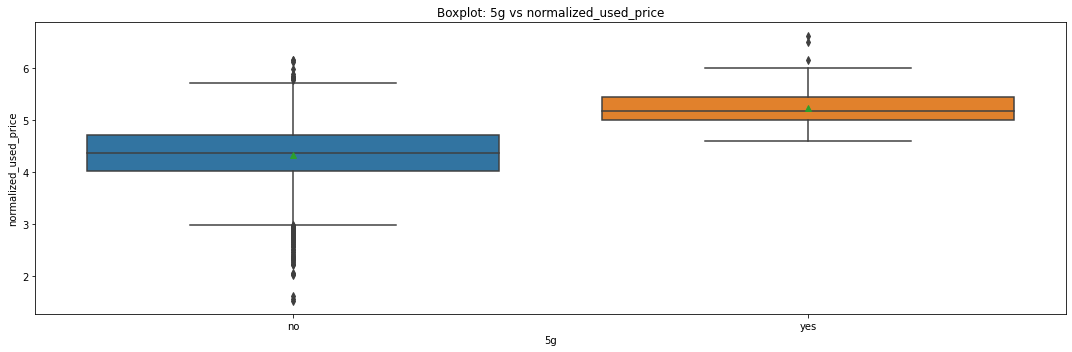

,count,mean,std,min,25%,50%,75%,max
5g,,,,,,,,
no,3302.0,4.325089,0.567316,1.536867,4.014986,4.372292,4.705264,6.158969
yes,152.0,5.225482,0.338917,4.602667,4.993617,5.178265,5.448899,6.619433


In [55]:
# Boxplot 5g vs normalized_used_price
output_pretty_boxplot(df, x='5g', y='normalized_used_price',\
                     figsize=(15,5));
describe_df = df.groupby(['5g'])['normalized_used_price'].describe()
describe_df

#### Observations
- Min normalized_used_price for 5g not available is 1.53 and the max is 6.15.
- Mean normalized_used_price for 5g not available is 4.32 which is less than the median indicating the data is left skewed.
- normalized_used_price for 5g not available has outliers.


- Min normalized_used_price for 5g available is 4.60 and the max is 6.61.
- Mean normalized_used_price for 5g available is 5.22 which is greater than the median indicating the data is right skewed.
- normalized_used_price for 5g available has outliers.

#### Let's investigate normalized_used_price vs normalized_new_price with an os hue

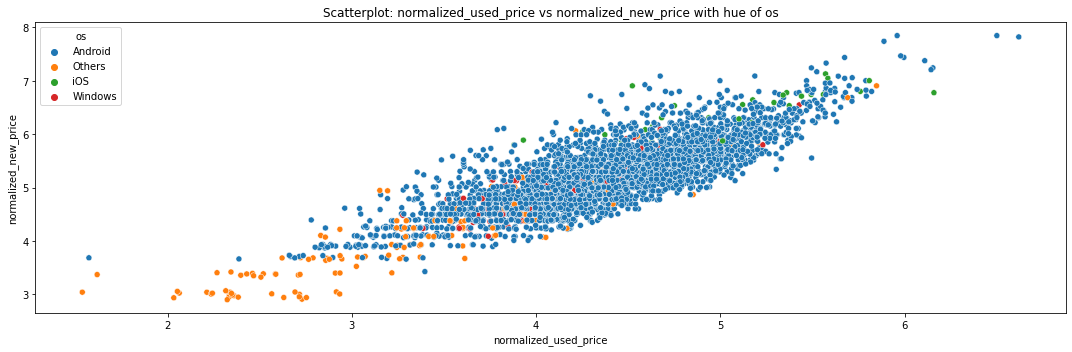

In [56]:
# scatterplot normalized_used_price vs normalized_new_price
output_pretty_scatterplot(df, x='normalized_used_price', y='normalized_new_price', hue='os');

#### Observations
- normalized_used_price and normalized_new_price show a positive correlation regardless of os type.

#### Let's investigate days_used vs normalized_new_price with an os hue

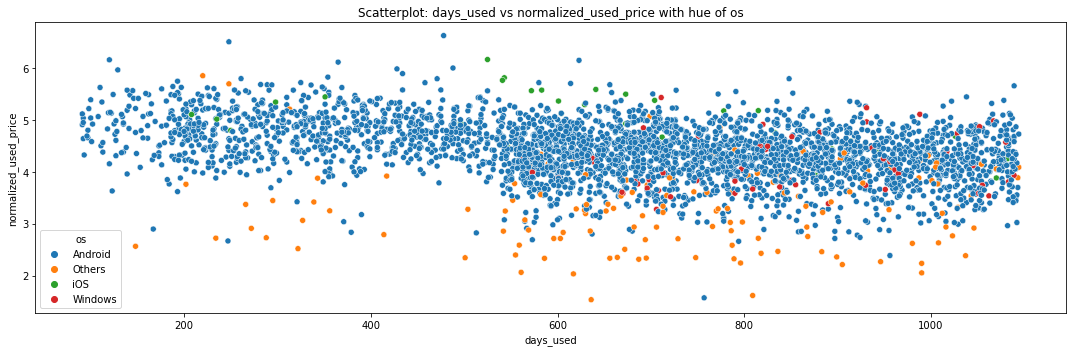

In [57]:
# scatterplot days_used vs normalized_new_price
output_pretty_scatterplot(df, x='days_used', y='normalized_used_price', hue='os');

#### Observations
- normalized_used_price has a slight negative correlation with days_used in other words as days_used increases generally normalized used_price decreases.

#### Let's investigate screen_size vs normalized_used_price with an os hue

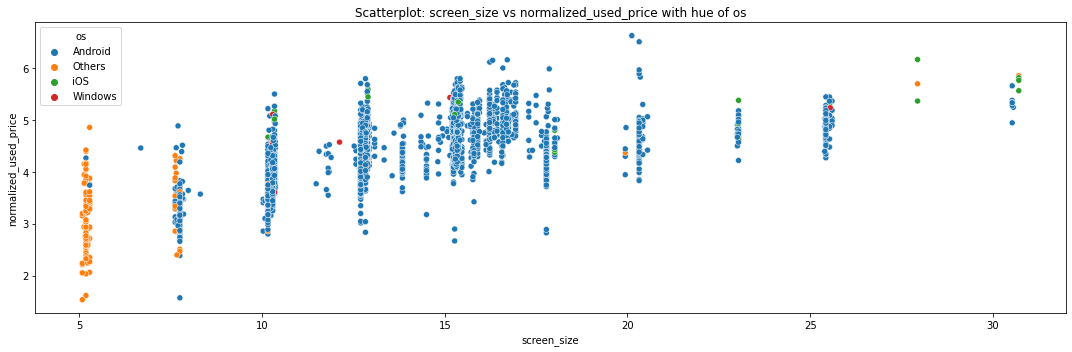

In [58]:
# scatterplot screen_size vs normalized_new_price
output_pretty_scatterplot(df, x='screen_size', y='normalized_used_price', hue='os');

#### Observations
- screen_size shows a positive correlation with normalized_used_price althogh the correlation seems to flatten past screen_sizes greater than 15.
- We can see Android does not offer as many options as others on the low end of screen sizes. 

#### Let's investigate weight vs normalized_used_price with an os hue

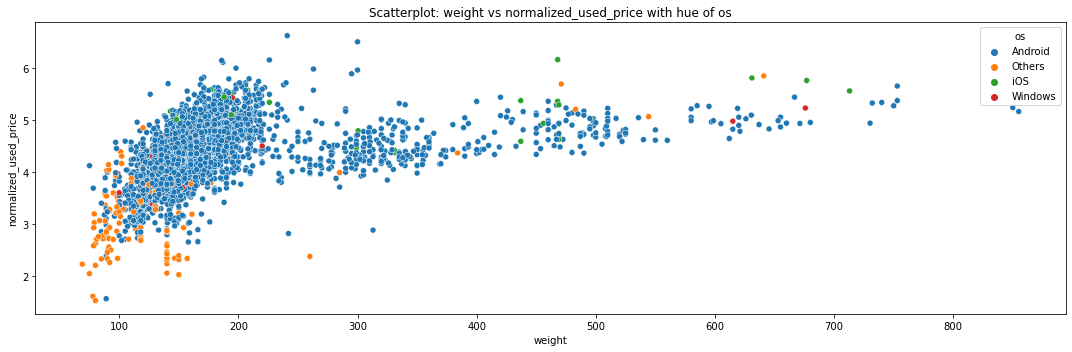

In [59]:
# scatterplot weight vs normalized_new_price with an os hue
output_pretty_scatterplot(df, x='weight', y='normalized_used_price', hue='os');

#### Observations
- weight seems to have a slight positive correlation with normalized_used_price.
- The majority of the devices with Others os tend be on the lower end of weight.

#### Let's investigate battery vs normalized_used_price with an os hue

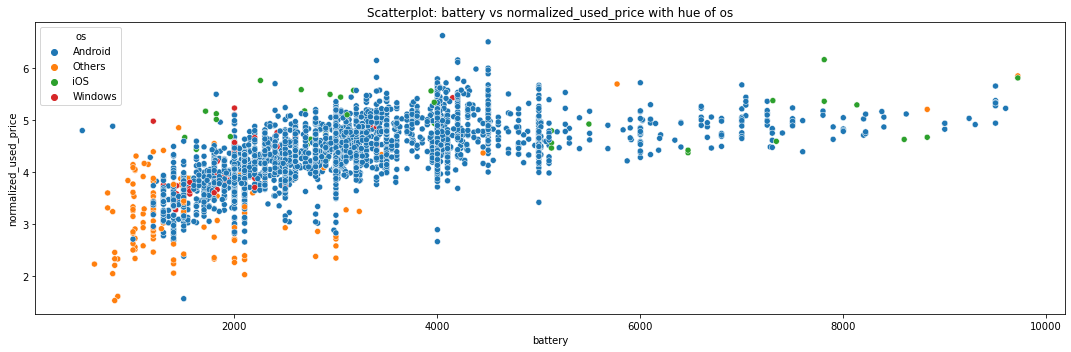

In [60]:
# scatterplot battery vs normalized_new_price
output_pretty_scatterplot(df, x='battery', y='normalized_used_price', hue='os');

#### Observations
- battery has a positive correlation with normalized_used_price.

#### Let's investigate years_since_release vs normalized_used_price with an os hue

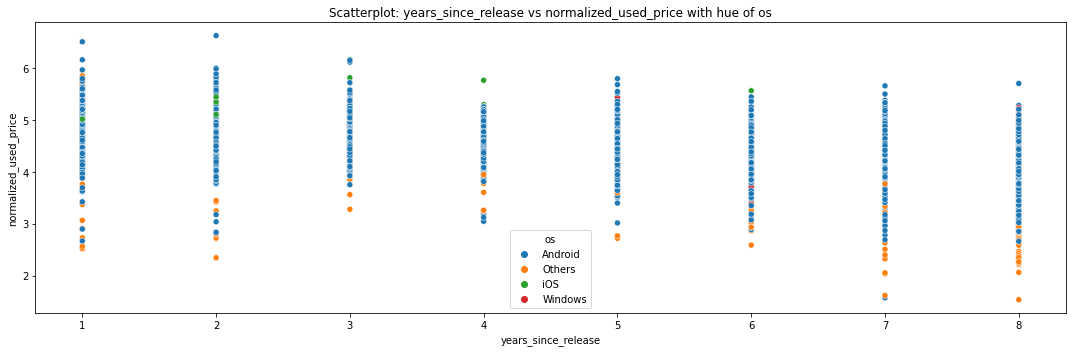

In [61]:
# scatterplot normalized_used_price vs years_since_release
output_pretty_scatterplot(df, x='years_since_release', y='normalized_used_price', hue='os');

#### Observations
- years_since_release has a negative correlation with normalized_used_price.
- For the most part Others devices occupy the lowest prices for each of the years_since_release

## 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

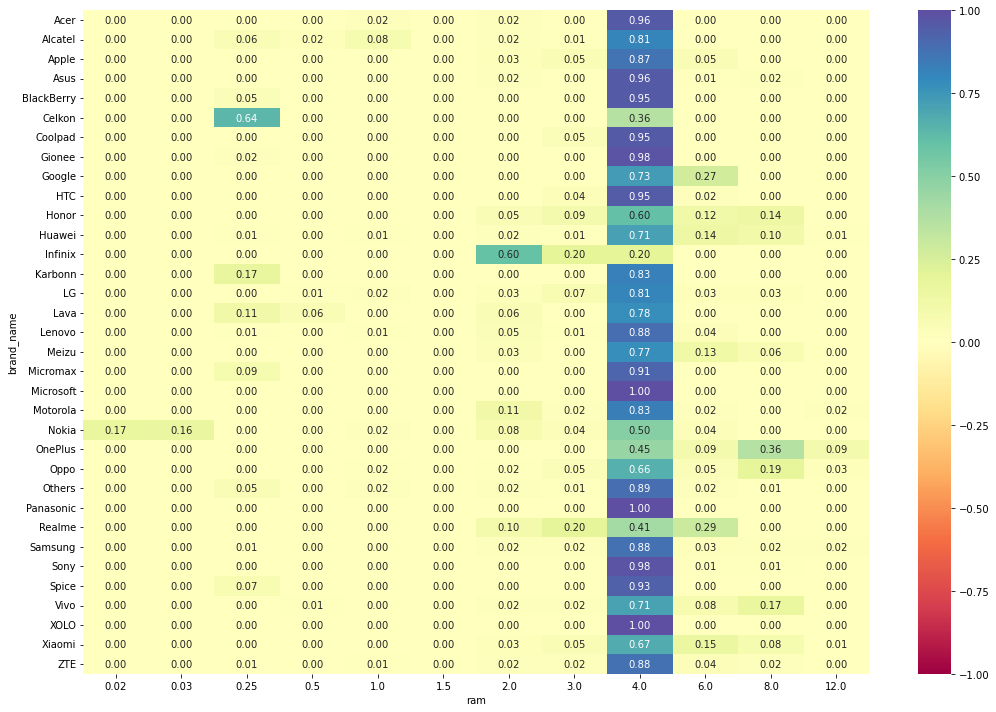

In [62]:
my_crosstab = pd.crosstab(df['brand_name'], df['ram'], normalize='index')
plt.figure(figsize=(15, 10))
sns.heatmap(
    my_crosstab, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

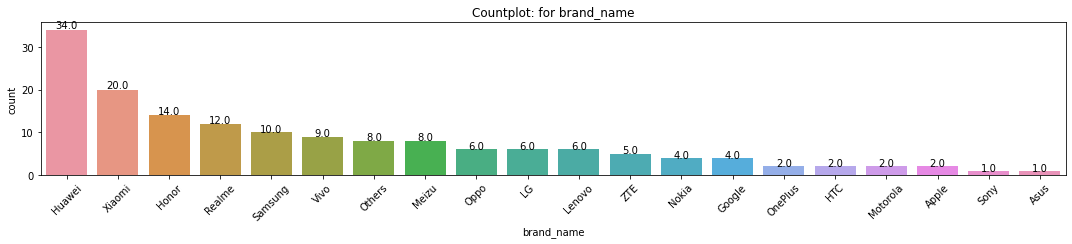

In [63]:
# Countplot for brands offering 6GB
output_pretty_countplot(df[df['ram'] == 6], 'brand_name',\
                       order=df[df['ram'] == 6]['brand_name'].value_counts().index);

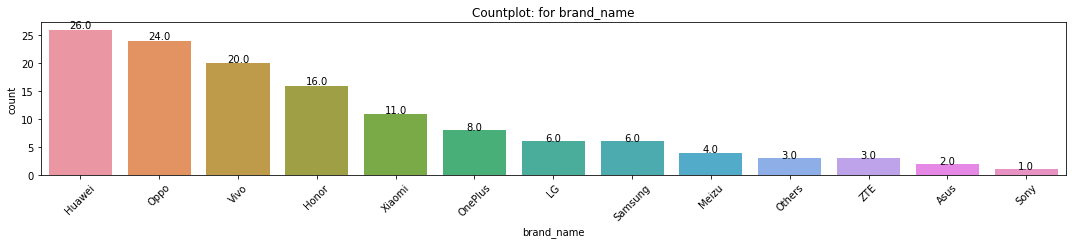

In [64]:
# Countplot for brands offering 8GB
output_pretty_countplot(df[df['ram'] == 8], 'brand_name',\
                       order=df[df['ram'] == 8]['brand_name'].value_counts().index);

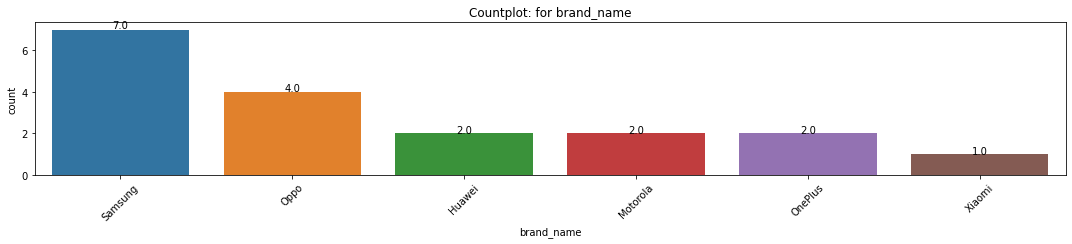

In [65]:
# Countplot for brands offering 12GB
output_pretty_countplot(df[df['ram'] == 12], 'brand_name',\
                       order=df[df['ram'] == 12]['brand_name'].value_counts().index);

#### Observations
- Most of the devices across brand_names offer 4GB of ram. 
- For Microsoft, Panasonic and XOLO devices 100% are 4GB,
- Top three brands offering 6GB device support are: Huawei, Xiaomi and Honor.
- Top three brands offering 8GB device support are: Huawei, Oops and Vivo.
- Top three brands offering 12GB device support are: Samsung, Oopo and Huawei.

## 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

count    341.000000
mean     332.275660
std      155.501832
min      118.000000
25%      198.000000
50%      300.000000
75%      467.000000
max      855.000000
Name: weight, dtype: float64


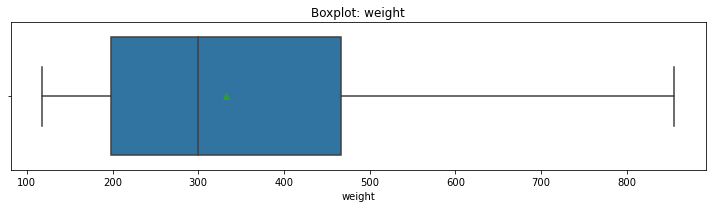

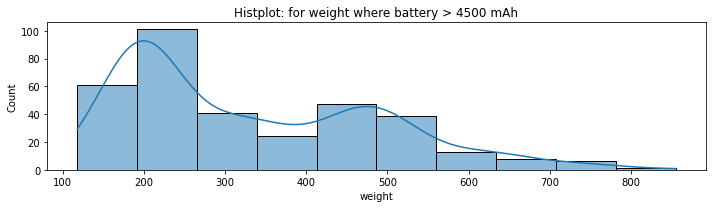

In [66]:
# boxplot and histplot for weight where ['battery'] > 4500
output_pretty_numeric_plots(df[df['battery'] > 4500], 'weight', title_suffix=' where battery > 4500 mAh')

#### Observations
- There are 341 devices with a battery greater than 4500mAh.
- The min weight for devices with a battery greater than 4500mAh is 118 while the max is 855.
- The mean with for devices with a battery greater than 4500mAh is 332.27 which is greater than the median indicating the data is right skewed.
- The data is modal with one large peak.

## 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

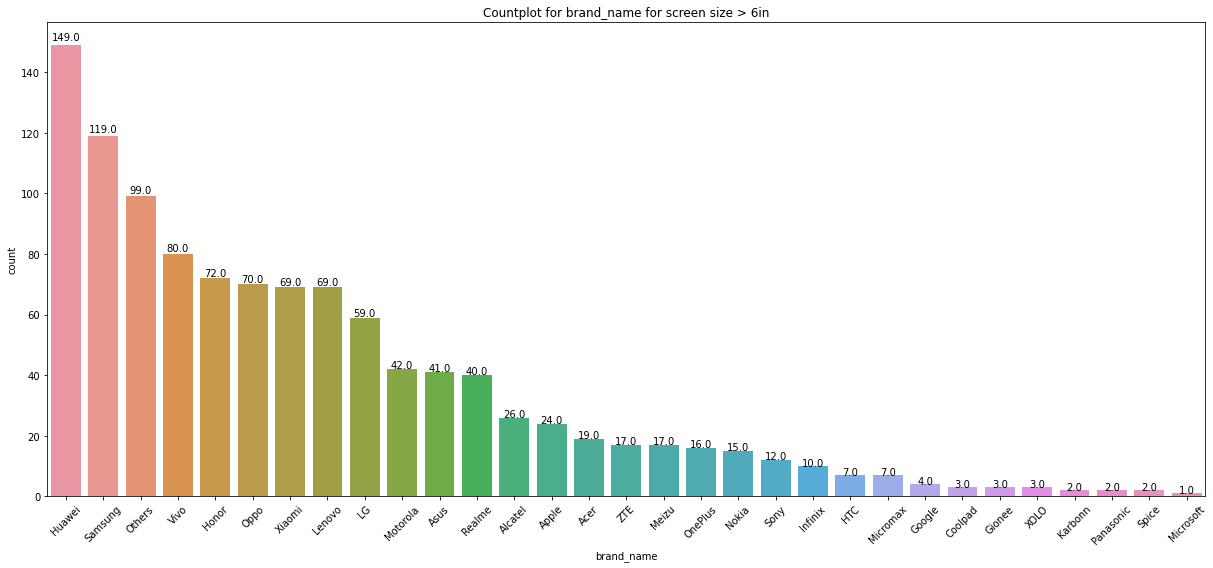

Total devices available across all brands with screen_size > 6in is 1099 


In [67]:
# Output countplot for brand_name for 'screen_size' > 6
six_inches = 6 * 2.54
output_pretty_countplot(df[df['screen_size'] > six_inches], 'brand_name', \
                        order=df[df['screen_size'] > six_inches]['brand_name'].value_counts().index,\
                        figsize=(17,8),\
                        title='Countplot for {} for screen size > 6in'.format('brand_name'))
print('Total devices available across all brands with screen_size > 6in is {} '.\
              format(df[df['screen_size'] > six_inches]['brand_name'].count()))

#### Observations
- The top three brands offerring screen_size greater than 6 are Huawei, Samsung and Others.
- Total devices available across all brands with screen_size > 6in is 1099.
- This represents 31.8% of the devices (1099/3454).

## 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

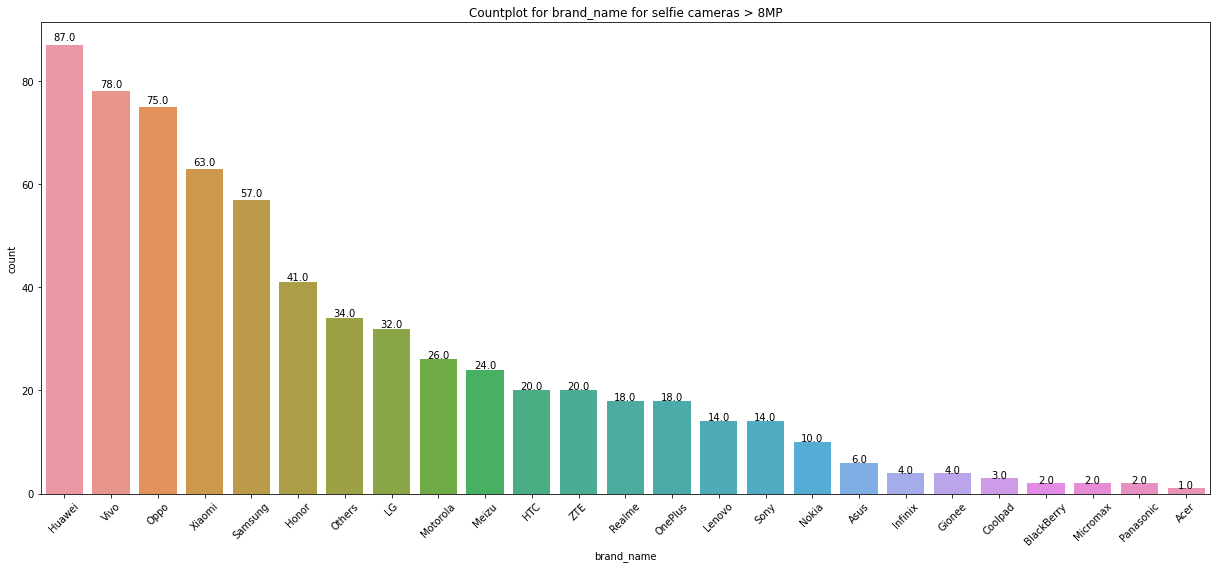

Total devices available across all brands with selfie_camera_mp > 8MP is 655 


In [68]:
# Output countplot for brand_name for 'selfie_camera_mp' > 8 
output_pretty_countplot(df[df['selfie_camera_mp'] > 8], 'brand_name', \
                        order=df[df['selfie_camera_mp'] > 8]['brand_name'].value_counts().index,\
                        figsize=(17,8),\
                        title='Countplot for {} for selfie cameras > 8MP'.format('brand_name'))
print('Total devices available across all brands with selfie_camera_mp > 8MP is {} '.\
      format(df[df['selfie_camera_mp'] > 8]['brand_name'].count()))

#### Observations
- The top three brands offerring selfie_camera_mp greater than 8MP are Huawei, Vivo and Oopo.
- Total devices available across all brands with selfie_camera_mp > 8MP is 655.
- This represents 18.9% of the devices (655/3454).

## 7. Which attributes are highly correlated with the normalized price of a used device?

#### Observations
- See heatmap <a href = #link1>here</a> for more details.
- normalized_new_price has the highest positive correlation with normalized_used_price of .83.
- battery, selfie_camera_mp, screen size and normalized_used_price have a positive correlation of .61.
- main_camera_mp has a positive correlation with normalized_used_price of .56.
-  ram has a positive correlation with normalized_used_price of .52.

### Data Preparation for Modeling
- We want to predict the normalized_used_price
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [69]:
# defining X and y variables
target_variable = 'normalized_used_price'
X = df.drop(target_variable, axis=1)
y = df[target_variable]

In [70]:
X.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1


In [71]:
y.head()

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64

In [72]:
# let's add the intercept to data
X = sm.add_constant(X)

In [73]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [74]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [75]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


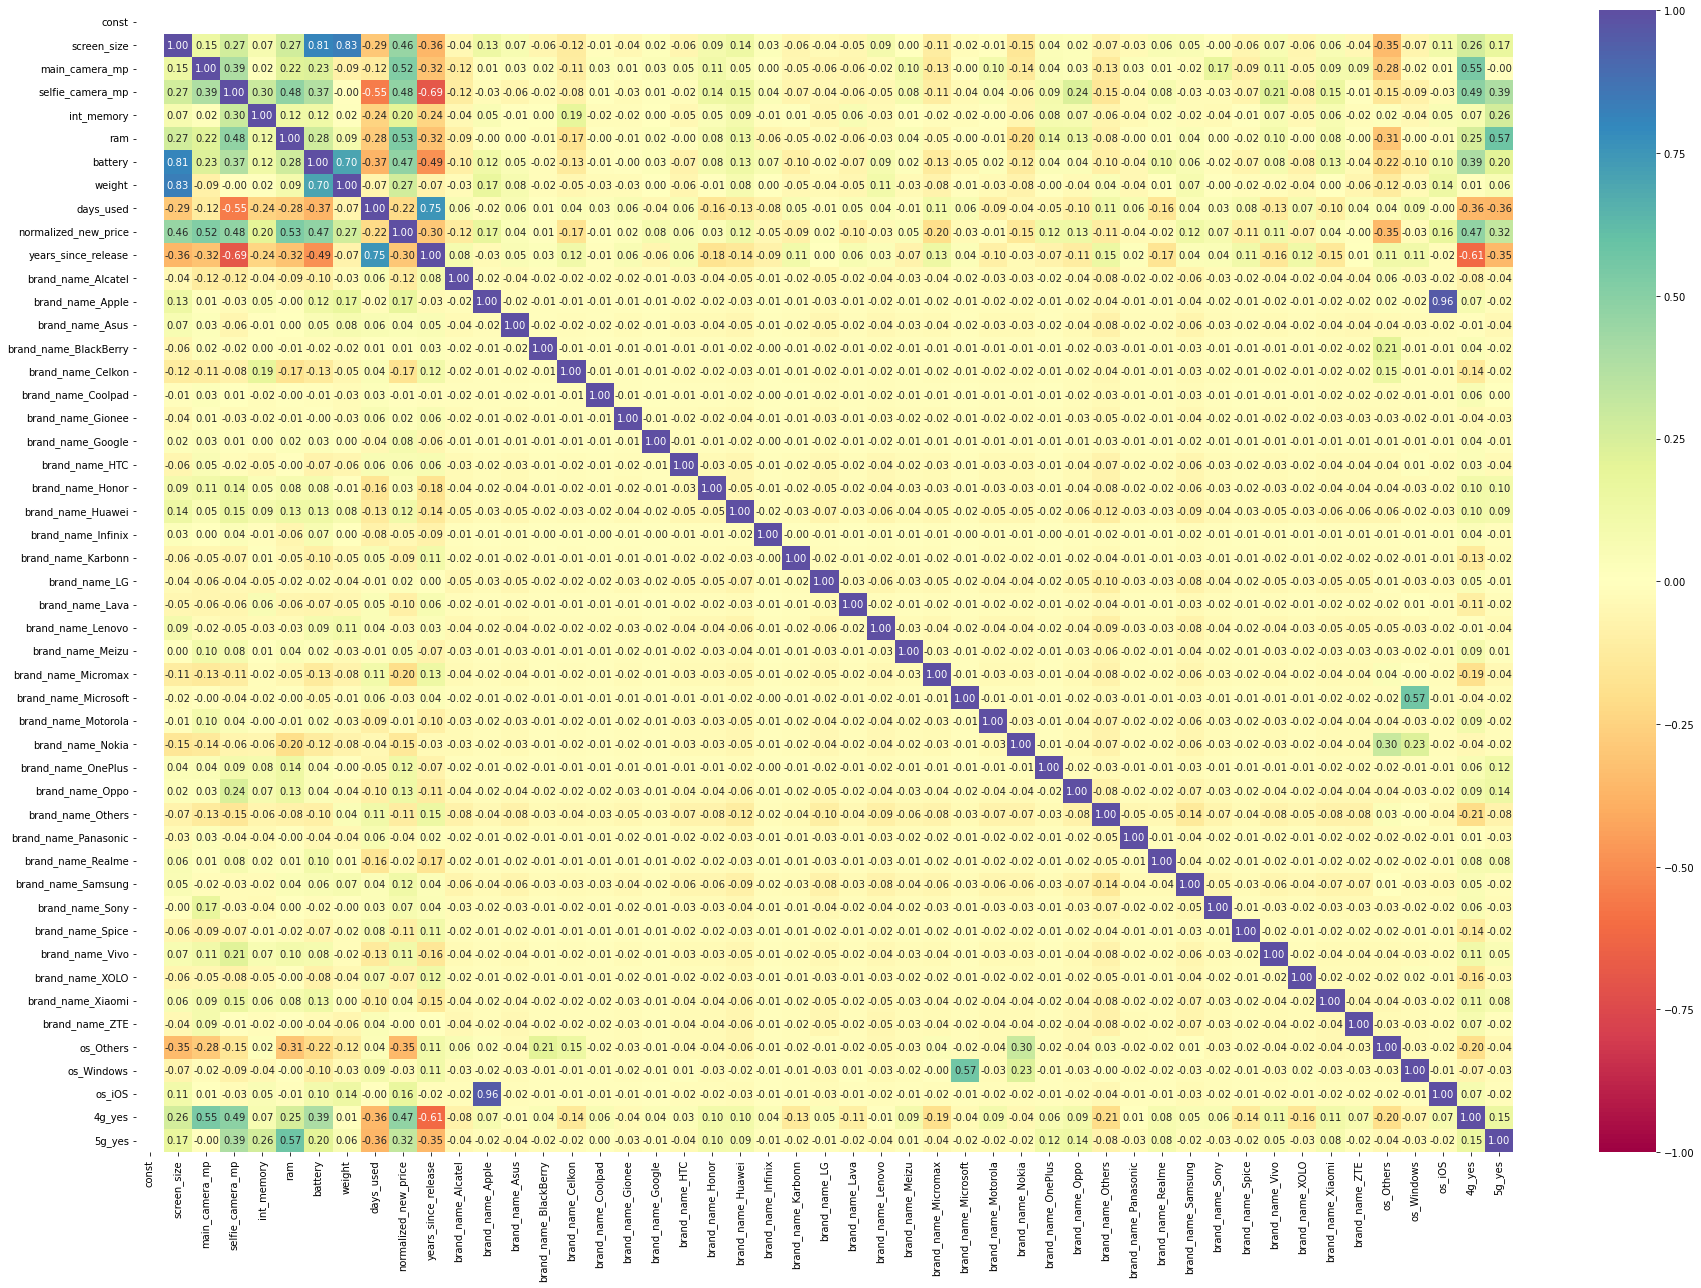

In [76]:
# Plot a heatmap of all the independent variables
plt.figure(figsize=(26, 18))
sns.heatmap(
    X.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations
- We see an extremely high positive correlation between brand_name_Apple and os_iOS of .96.
- We see an extremely high positive correlation between screen_size and weight of .83.
- We see an extremely high positive correlation between screen_size and battery of .81
- We see a high negative correlation between years_since_release and selfie_camera_mp of -.69.

## Model Building - Linear Regression

In [77]:
# Fit the model and output an ols summary
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     268.1
Date:                   Sun, 01 Jan 2023   Prob (F-statistic):               0.00
Time:                           13:09:13   Log-Likelihood:                 121.53
No. Observations:                   2417   AIC:                            -145.1
Df Residuals:                       2368   BIC:                             138.7
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpreting the Regression Results:

1. **Adjusted.  $R^{2}$**: It reflects the fit of the model.
    - Adjusted  $R^{2}$ values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj.  $R^{2}$ is **0.841**, which is favorable.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.3294**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `screen_size` is **0.0244**.

## Model Performance Check

In [78]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
model_train_perf = model_performance_regression(model, x_train, y_train)
model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.230105,0.180571,0.844587,0.84137,4.332694


In [79]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
model_test_perf = model_performance_regression(model, x_test, y_test)
model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239083,0.185073,0.841519,0.833651,4.511746


#### Observations
* The model is able to explain ~84.4% of the variation in the data

* The train and test RMSE and MAE are low and comparable thus, our model is not suffering from overfitting

* MAE suggests that the model can predict normalized_used_price within a mean error of 0.185 on the test data

* The MAPE on the test set suggests we can predict within 4.51% of the normalized used price.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [80]:
# Check the variance inflation factors and output summary
vif_df = checking_vif(x_train)
vif_df.sort_values(by='VIF', ascending=False)

,feature,VIF
0,const,228.926905
12,brand_name_Apple,13.055807
46,os_iOS,11.783577
34,brand_name_Others,9.710859
1,screen_size,7.681828
37,brand_name_Samsung,7.539593
7,weight,6.372828
21,brand_name_Huawei,5.985784
10,years_since_release,4.891179
24,brand_name_LG,4.848817


#### Observations
- brand_name_Apple and os_iOS have a high multicollinearity.
- brand_name_Others has a high moderate multicollinearity.

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted $R^{2}$ and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted  $R^{2}$.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

A custom function treating_multicollinearity will be used do this.

In [81]:
col_list = ['brand_name_Apple', 'os_iOS', 'brand_name_Others', 'brand_name_Samsung','screen_size']

treated_vif = treating_multicollinearity(x_train, y_train, col_list)
treated_vif

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.841503,0.232425
1,brand_name_Others,0.841501,0.232426
2,os_iOS,0.841493,0.232433
3,brand_name_Samsung,0.841467,0.232452
4,screen_size,0.838089,0.234915


#### Observations
- From the heatmap above we see a very high correlation between brand_name_Apple and os_iOS in addition to a moderately high VIF. 
- Removing brand_name_Apple and brand_name_Others does not appear to have a deleterious effect on adj $R^{2}$ or RMSE.
- Several other brand_name dummy variables have a moderately high VIF so the intent is that removing brand_name_Apple and brand_name_Others will lower those values.

In [82]:
# Remove columns identified with high VIF values
col_to_drop_list = ['brand_name_Others', 'brand_name_Apple']
x_train2 = x_train.loc[:, ~x_train.columns.isin(col_to_drop_list)]
x_test2 = x_test.loc[:, ~x_test.columns.isin(col_to_drop_list)]

# Check VIF now
vif_df = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop_list)
vif_df.sort_values(by='VIF', ascending=False)

VIF after dropping  ['brand_name_Others', 'brand_name_Apple']


,feature,VIF
0,const,151.518237
1,screen_size,7.574775
7,weight,6.344666
10,years_since_release,4.882087
6,battery,4.039900
9,normalized_new_price,3.126539
3,selfie_camera_mp,2.788592
8,days_used,2.667224
45,4g_yes,2.466906
5,ram,2.228360


#### Observations
- After removing brand_name_Others, brand_name_Apple the brand_name* independent variables were positively impacted.
- Note that screen_size and weight still have a moderate VIF level however I feel that those independent variables will be important to explaining the model to the business.

In [83]:
x_train2.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
3026,1.0,10.29,8.0,0.3,16.0,4.0,1800.0,120.0,819,4.796204,...,0,0,1,0,0,0,0,0,0,0
1525,1.0,15.34,13.0,5.0,32.0,4.0,4050.0,225.0,585,5.434595,...,0,0,0,0,0,0,0,0,1,0
1128,1.0,12.70,13.0,5.0,32.0,4.0,2550.0,162.0,727,5.137914,...,0,0,0,0,0,0,0,0,0,0
3003,1.0,12.83,8.0,5.0,16.0,4.0,3200.0,153.0,800,5.189228,...,0,0,1,0,0,0,0,0,1,0
2907,1.0,12.88,13.0,16.0,16.0,4.0,2900.0,160.0,560,5.016220,...,0,0,0,0,0,0,0,0,1,0


In [84]:
# Fit a model and output OLS summary
model = sm.OLS(y_train, x_train2).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     280.0
Date:                   Sun, 01 Jan 2023   Prob (F-statistic):               0.00
Time:                           13:09:14   Log-Likelihood:                 121.51
No. Observations:                   2417   AIC:                            -149.0
Df Residuals:                       2370   BIC:                             123.1
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpreting the Regression Results:

4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.


5. **P>|t|**: It is p-value.
   
    * For each independent feature, there is a null hypothesis and an alternate hypothesis. Here $\beta_i$ is the coefficient of the $i$th independent variable.

        - $H_o$ : Independent feature is not significant ($\beta_i = 0$)
        - $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)

    * (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.
        
        - A p-value of less than 0.05 is considered to be statistically significant.


6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

**Observations**
- $R^{2}$ stayed ~84.5% which shows dropping the columns had no negative effect on the model.
- We can see that adj. $R^{2}$ improved to ~84.2% which shows that the dropped columns had a positive effect on the model.
- As there is for the most part no multicollinearity, we can look at the p-values of predictor variables to check their significance.

### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [85]:
selected_features = fit_and_refine_model(x_train2, y_train)

After removing independent variables with high p values we are left with the following variables:
 ['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [86]:
# Remove independent variables with high p-values
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [87]:
# Fit a model and output OLS summary
model = sm.OLS(y_train, x_train3).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     1068.
Date:                   Sun, 01 Jan 2023   Prob (F-statistic):               0.00
Time:                           13:09:14   Log-Likelihood:                 101.62
No. Observations:                   2417   AIC:                            -177.2
Df Residuals:                       2404   BIC:                            -102.0
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

#### Observations
- We have dropped down to twelve independent variables. 
- Our $R^{2}$ dropped slightly from .845 to .842 and our adj $R^{2}$ dropped slightly from .842 to .841.

In [88]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
model_train_perf = model_performance_regression(model, x_train3, y_train)
model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232008,0.182006,0.842006,0.841152,4.365897


In [89]:
# checking model performance on train set (seen 70% data)
print("Testing Performance\n")
model_test_perf = model_performance_regression(model, x_test3, y_test)
model_test_perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237159,0.183662,0.84406,0.842078,4.47268


#### Observations
- The model is able to explain ~84.2% of the variation in the data.
- The training $R^2$ is ~84.2%, so the model is not underfitting.

- The train and test RMSE and MAE are comparable, so the model is not overfitting.

- MAE suggests that the model can predict normalized used price within a mean error of 0.1836 on the test data

- MAPE of 4.47 on the test data means that we are able to predict within 4.47% of the normalized used prices

### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

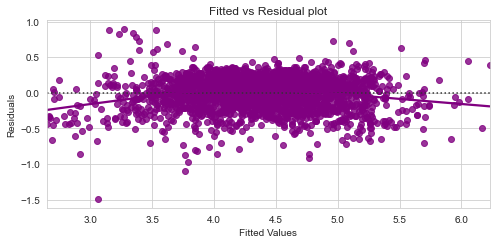

,Actual Values,Fitted Values,Residuals
0,4.087488,3.855596,0.231892
1,4.448399,4.629918,-0.181518
2,4.315353,4.280508,0.034845
3,4.282068,4.238366,0.043703
4,4.456438,4.469967,-0.013529


In [90]:
# Output fitted vs residual plot
df_pred = output_residuals(model, y_train)
df_pred.head()

#### Observations
* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

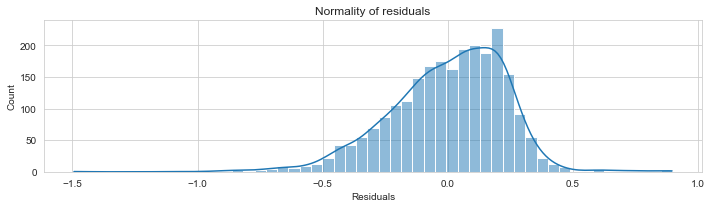

In [91]:
# Histplot of Residuals
output_pretty_histplot(df_pred, x="Residuals", title="Normality of residuals")

#### Observations
- The histogram of residuals does have a bell shape although it is slightly skewed.

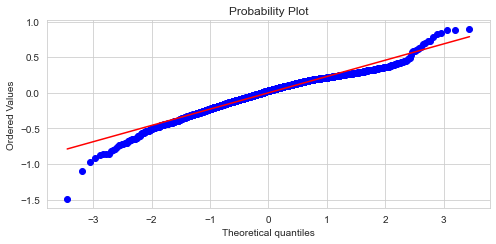

In [92]:
# Output residuls vs normal distribution
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### Observations
- The residuals more or less follow a straight line except for the tails.

In [93]:
# Calculate shapiro
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9705244302749634, pvalue=6.908069335843312e-22)

#### Observations
- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **Theoretically the assumptions have been satisfied**.

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [94]:
# Calculate Goldfeld–Quandt test
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0393293043983938), ('p-value', 0.2524675721703576)]

#### Observations
- **Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [95]:
# predictions on the test set
pred = model.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.373107
2341,3.696103,3.964844
1913,3.592093,3.706762
688,4.306495,4.104938
650,4.522115,5.130390
2291,4.259294,4.387984
40,4.997685,5.456927
1884,3.875359,4.067003
2538,4.206631,4.043865
45,5.380450,5.290735


#### Observations
- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [96]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [97]:
# Fix a model, output the OLS summary and the equation of fit.
model_final = sm.OLS(y_train, x_train_final).fit()
print(model_final.summary())
output_equation_of_fit('normalized_used_price', model_final)

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     1068.
Date:                   Sun, 01 Jan 2023   Prob (F-statistic):               0.00
Time:                           13:09:15   Log-Likelihood:                 101.62
No. Observations:                   2417   AIC:                            -177.2
Df Residuals:                       2404   BIC:                            -102.0
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

#### Observations
- Equation of fit: 

> __normalized_used_price = 1.3908 *  + 0.0237 * (screen_size) + 0.0205 * (main_camera_mp) + 0.0139 * (selfie_camera_mp) + 0.0210 * (ram) + 0.0008 * (weight) + 0.4197 * (normalized_new_price) + -0.0209 * (years_since_release) + 0.0445 * (brand_name_Lenovo) + 0.0681 * (brand_name_Nokia) + 0.0941 * (brand_name_Xiaomi) + -0.0733 * (os_Others) + 0.0434 * (4g_yes)__

- The model is able to explain ~84.2% of the variation in the data.
- The adj. $R^{2}$ is ~84.1%, which is favorable.

In [98]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
model_final_train_perf = model_performance_regression(
    model_final, x_train_final, y_train
)
model_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232008,0.182006,0.842006,0.841152,4.365897


In [99]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
model_final_test_perf = model_performance_regression(
    model_final, x_test_final, y_test
)
model_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237159,0.183662,0.84406,0.842078,4.47268


#### Observations
- The model is able to explain ~84.2% of the variation in the data.
- Given our training $R^2$ is ~84.2% our model is not suffering from underfitting.
- The train and test RMSE and MAE are low and comparable thus, our model is not suffering from overfitting.
- The MAPE on the test set suggests we can predict within 4.47% of the normalized used prices.

**Hence, we can conclude the model model_final is good for prediction as well as inference purposes.**

## Actionable Insights and Recommendations 

- Final equation of fit is:
> __normalized_used_price = 1.3908 *  + 0.0237 * (screen_size) + 0.0205 * (main_camera_mp) + 0.0139 * (selfie_camera_mp) + 0.0210 * (ram) + 0.0008 * (weight) + 0.4197 * (normalized_new_price) + -0.0209 * (years_since_release) + 0.0445 * (brand_name_Lenovo) + 0.0681 * (brand_name_Nokia) + 0.0941 * (brand_name_Xiaomi) + -0.0733 * (os_Others) + 0.0434 * (4g_yes)__
- The model is able to explain ~84.2% of the variation in the data and within 4.47% of the normalized_used_price on the test data.
    * This indicates that the model is good for prediction as well as inference purposes.
- Constant of 1.3908 in the equation of fit.
- If the screen_size of a device increases by one unit, then the normalized_used_price increases by 0.0237 units, all other variables held constant.
- If the main_camera_mp of a device increases by one unit, then the normalized_used_price increases by 0.0205 units, all other variables held constant.
- If the selfie_camera_mp of a device increases by one unit, then the normalized_used_price increases by 0.0139 units, all other variables held constant.
- If the ram of a device increases by one unit, then the normalized_used_price increases by 0.0210 units, all other variables held constant.
- If the weight of a device increases by one unit, then the normalized_used_price increases by 0.0008 units, all other variables held constant.
- If the normalized_new_price of a device increases by one unit, then the normalized_used_price increases by 0.4197 units, all other variables held constant.
- If the years_since_release of a device increases by one unit, then the normalized_used_price decreases by -0.0209 units, all other variables held constant.
- If the device has a brand name of Lenovo, then the normalized_used_price increases by 0.0445 units, all other variables held constant.
- If the device has a brand name of Nokia, then the normalized_used_price increases by 0.0681 units, all other variables held constant.
- If the device has a brand name of Xiaoml, then the normalized_used_price increases by 0.0941 units, all other variables held constant.
- If the device has a brand name of Others, then the normalized_used_price decreases by -0.0733 units, all other variables held constant.
- If the device has 4g enabled, then the normalized_used_price increases by 0.0434 units, all other variables held constant.

### Data Insights
- The top five brand names (in term of number of devices) are Others, Samsung, Huawei, LG and Lenovo.
- The top five brand names make up 42.44% of all the devices.


- Android devices dominate the market with 93.05% share.
- Android currently owns the market in terms of 5g devices which account for aboutn 4.7% of their devices.


- The top three brands with the highest mean normalized_used_price are: OnePlus, Apple and Google.
- The highest mean normalized_used_price is 5.152 for OnePlus devices.
- The top three brands with the highest mean normalized_new_price are: Apple, Oneplus and Google.
- The highest mean normalized_new_price is 6.33 for Apple devices.


- normalized_new_price has the highest positive correlation with normalized_used_price.
- years_since_release has the highest negative corelation with  with normalized_used_price.
- The top three brand names with the largest mean years_since_release are: Spice, Celkon and Karbonn.
    >- These three brands also happen to have the lowest mean normalized_used_prices.


- On average 4g/5g devices have a normalized_used_price 34.11% greater than pre-4g devices.
- On average 4g/5g devices have a normalized_used_price 14.96% greater than 4g only devices.

#### Further analysis that can be done:
* Acquire information about the condition of the device and rerun the analysis since this feature is likely to have a predictive impact on normalized_used_price.
- Investigate int_memory values the outliers seem quite high.
- Rerun this analysis after the 5g protocol emerges and the impact of 2g, 3g and 4g wane.
- It would be instructive to determine the margin that ReCell makes on used devices in order to enhance the model to not only predict the used price but to maximize margin.

___